In [ ]:
## Need to add this to the top of anything using fimo: 
 
promoter_fname =  y1000plus_dir + 'promoter_sets/' + promoters_prefix + '_fimo.fasta'
fname_prefix = promoters_prefix + '_' + motif_name
promoter_scan_fimo(promoters_fname, fname_prefix, motif_name, motif_fname, thresh, motif_in_file='All')   


In [26]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
home directory is /home/heineike/
y1000plus_tools dir is /home/heineike/github/y1000plus_tools/
y1000plus data dir is /home/heineike/genomes/y1000plus/
Importing y1000plus_tools.py
importing io_library.py
sys.path : 

['/home/heineike/github/y1000plus_tools/scripts', '', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/extensions', '/home/heineike/.ipython', '/home/heineike/github/y1000

In [9]:
##Load all species and take subset that has genomes
y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

#not including outgroup species
y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']

# #Select only clades of interest: 
# clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
# #clades_of_interest = {'Saccharomycetaceae'}
# y1000_species_subset = y1000_species[y1000_species['Major clade'].isin(clades_of_interest)]


In [79]:
##Load AA metabolism genes and 
aa_met_genes = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/aa_metabolism_genes.csv'), index_col=0)

gois = list(aa_met_genes.index)

#Make promoter files for various genes of interest
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]

goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

more than one goi in same orthogroup :OG1030 found_genes: 
['110_4697', '110_4199']
more than one goi in same orthogroup :OG1096 found_genes: 
['110_4987', '110_946']
more than one goi in same orthogroup :OG1115 found_genes: 
['110_827', '110_449']
more than one goi in same orthogroup :OG1210 found_genes: 
['110_1406', '110_425']
more than one goi in same orthogroup :OG1313 found_genes: 
['110_447', '110_3134']
more than one goi in same orthogroup :OG1433 found_genes: 
['110_634', '110_2626']
more than one goi in same orthogroup :OG1516 found_genes: 
['110_695', '110_4813']
more than one goi in same orthogroup :OG1675 found_genes: 
['110_1965', '110_4331']
more than one goi in same orthogroup :OG1892 found_genes: 
['110_217', '110_2273']
more than one goi in same orthogroup :OG2588 found_genes: 
['110_1713', '110_4392']


In [53]:
#For a given goi, get y1000 promoters and proteins and deposit into a file
#'GDH1'  #GDH1 in the same orthogroup as GDH3
#'LYS4'  

L_prom = 1000

goi_common_name =  'LYS4'
goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
og = goi_og_lookup[goi_y1000_id]
og_genes = og_genes_lookup[og]


#For a given orthogroup extract promoters
og_genes_y1000_gene_id = y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_common_name)
print(goi_common_name + ' promoter extraction complete')


promoter region extends past the scaffold, genome_name = spathaspora_gorwiae Gene = Seq_6517, L_prom = 1000
promoter region extends past the scaffold, genome_name = yHMPu5000034673_blastobotrys_nivea_160519 Gene = Seq_2359, L_prom = 1000
promoter region extends past the scaffold, genome_name = yHMPu5000034622_pichia_occidentalis_160519 Gene = Seq_1124, L_prom = 1000
LYS4 promoter extraction complete
yHAB166_kazachstania_yakushimaensis_160519
yHMPu5000026197_brettanomyces_custersianus_160519
eremothecium_cymbalariae
metschnikowia_lockheadii
yHMPu5000035690_candida_vartiovaarae_160613
candida_orthopsilosis
yHMPu5000034950_citeromyces_hawaiiensis_160519
yHMPu5000035037_candida_montana_160519
saccharomyces_arboricola
yHMPu5000041693_debaryomyces_nepalensis_160928
yHMPu5000034614_saturnispora_silvae_160519
yHMPu5000035033_candida_cretensis_160519
lachancea_thermotolerans
yHMPu5000041743_candida_hawaiiana_160928
yHMPu5000034957_hanseniaspora_osmophila_160519
zygosaccharomyces_bailii
yHMPu500

metschnikowia_aberdeeniae
yHMPu5000034742_lipomyces_suomiensis_160519
wickerhamomyces_ciferrii
yHMPu5000034749_lipomyces_mesembrius_160519
eremothecium_coryli
yHMPu5000034632_candida_athensensis_160519
hanseniaspora_uvarum
yHMPu5000035645_yarrowia_divulgata_160519
ogataea_polymorpha
yHMPu5000035658_starmera_amethionina_160613
yHMPu5000035641_yamadazyma_scolyti_160613
yHMPu5000041818_magnusiomyces_tetrasperma_160928
yHMPu5000035652_torulaspora_maleeae_160613
starmerella_bombicola_JCM9596
yHMPu5000035643_yarrowia_bubula_160519
yHMPu5000034893_ogataea_philodendra_160519
yHMPu5000034884_peterozyma_toletana_160519
ogataea_methanolica
yHMPu5000034998_cephaloascus_albidus_160519
yHMPu5000034899_ogataea_kodamae_160519
eremothecium_sinecaudum
yHMPu5000034990_candida_corydali_160519
sporopachydermia_quercuum
yHMPu5000034637_ogataea_populiabae_160519
yHAB133_kazachstania_unispora_160519
candida_glabrata
yHMPu5000026274_komagataella_populi_160519
nadsonia_fulvescens_var_elongata
yHMPu5000034979_cy

## Make protein alignment

In [6]:
goi_common_name =  'LYS14'
goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
og = goi_og_lookup[goi_y1000_id]
og_genes = og_genes_lookup[og]

{'100_2504',
 '101_5336',
 '103_1880',
 '104_635',
 '105_2111',
 '106_4010',
 '107_171',
 '107_174',
 '109_2522',
 '110_4071',
 '111_1183',
 '112_1154',
 '113_4793',
 '114_2212',
 '115_4098',
 '116_2030',
 '119_2901',
 '119_3278',
 '119_4988',
 '11_1862',
 '11_2300',
 '120_1507',
 '120_5931',
 '123_4910',
 '124_1985',
 '125_3767',
 '125_943',
 '126_1841',
 '126_6914',
 '127_4151',
 '128_5717',
 '12_4027',
 '12_4749',
 '12_962',
 '131_5602',
 '132_2004',
 '133_4972',
 '136_1951',
 '139_2538',
 '139_522',
 '140_5331',
 '145_3894',
 '146_4942',
 '147_5825',
 '150_2031',
 '151_2633',
 '153_3964',
 '155_1648',
 '157_2443',
 '158_678',
 '159_2062',
 '159_2443',
 '15_4944',
 '160_4462',
 '161_116',
 '161_3943',
 '163_2264',
 '164_3612',
 '165_4513',
 '165_466',
 '168_2883',
 '169_1495',
 '169_4633',
 '16_2033',
 '16_383',
 '170_2713',
 '171_2017',
 '172_2840',
 '172_347',
 '173_1319',
 '174_544',
 '176_1471',
 '178_2109',
 '179_780',
 '17_776',
 '180_1618',
 '180_5211',
 '184_3161',
 '184_466

In [18]:
#Pick outgroup and test to see if orthogroup has something from outgroup: 
outgroup = 'Sugiyamaella lignohabitans'
# outgroup = 'Lipomyces starkeyi'
outgroup_orig_genome = y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'].values[0]
#'Yarrowia lipolytica'
# #outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
# y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])




y1000_id_outgroup = y1000_species_subset[y1000_species_subset['Species name']==outgroup]['spec_og_id'].values[0]

outgroup_gene = ''
for gene in og_genes: 
    if gene.split('_')[0]== str(y1000_id_outgroup):
        outgroup_gene = gene

if outgroup_gene =='': 
    print(outgroup + ' has no proteins in og ' + og + ' for ' + goi_common_name + '. Pick another outgroup')
else: 
    print('outgroup gene = ' + outgroup_gene)
    #Results: 
#GPM2/GPM3 no ortholog in Y. Lipolitica
#TPK1/TPK3 no ortholog in Y. lipolitica (interesting...)  
# Need to find new outgroup for those

outgroup gene = 131_5602


In [8]:
#Check to see which major clades / species are present in the orthogroup if 
#there is no good outgroup
specs_in_og = []
for gene in og_genes: 
    specs_in_og.append(gene.split('_')[0])

set(y1000_species_subset[y1000_species_subset['spec_og_id'].isin(set(specs_in_og))]['Major clade'])


{'CUG-Ala',
 'CUG-Ser1',
 'CUG-Ser2',
 'Dipodascaceae/Trichomonascaceae',
 'Phaffomycetaceae',
 'Pichiaceae',
 'Saccharomycetaceae',
 'Saccharomycodaceae',
 'Sporopachydermia clade'}

In [14]:
#Lipomyces is a good outgroup set: 
# 'Lipomyces oligophaga', 'Lipomyces starkeyi',
# 'Lipomyces suomiensis', 'Lipomyces doorenjongii',
# 'Lipomyces mesembrius', 'Lipomyces kononenkoae',
# 'Lipomyces japonicus', 'Lipomyces lipofer', 'Lipomyces arxii'

#'Lipomycetaceae'

#after that try: 
#Trigonopsidaceae
#Dipodascaceae/Trichomonascaceae
#'Alloascoideaceae'
#'Sporopachydermia clade'
#'Pichiaceae'
#'CUG-Ser2'
#'Phaffomycetaceae'
# 'Saccharomycodaceae'

#Test to see if orthogroup has anything from lipomyces: 
outgroup_clade =  'Dipodascaceae/Trichomonascaceae'
y1000_id_possible_outgroups_dict = dict(y1000_species_subset[y1000_species_subset['Major clade']==outgroup_clade][['spec_og_id','Species name']].values)
y1000_id_possible_outgroups = [str(y1000_spec_id) for y1000_spec_id in y1000_id_possible_outgroups_dict.keys()]


outgroup_genes = []
for gene in og_genes: 
    if gene.split('_')[0] in y1000_id_possible_outgroups:
        outgroup_genes.append(gene)

if len(outgroup_genes) ==0: 
    print(goi_common_name + ' orthogroup ' + og + ' has no proteins in the major clade ' + outgroup_clade + '. Pick another outgroup')
else:
    for gene in outgroup_genes:
        y1000_id = gene.split('_')[0]
        print('Species = ' + y1000_id_possible_outgroups_dict[int(y1000_id)] + ' , gene: ' + gene)

Species = Deakozyma indianensis , gene: 251_4566
Species = Sugiyamaella lignohabitans , gene: 131_5602
Species = Spencermartinsiella europaea , gene: 171_2017
Species = Groenewaldozyma salmanticensis , gene: 322_5643
Species = Zygoascus ofunaensis , gene: 273_3154
Species = Zygoascus meyerae , gene: 274_1303
Species = Candida incommunis , gene: 275_1499


In [16]:

protein_fname = goi_common_name + '_' + og
y1000plus_tools.extract_protein_seqs(og_genes, protein_fname, y1000_species_subset)
print(goi_common_name + ' protein sequence extraction complete')

saccharomycopsis_malanga
yHMPu5000034892_ogataea_pilisensis_160519
yHMPu5000035032_candida_gatunensis_160519
yHMPu5000035674_kregervanrija_delftensis_160613
ambrosiozyma_kashinagacola
metschnikowia_bicuspidata
yHMPu5000034952_citeromyces_siamensis_160519
yHMPu5000034946_ambrosiozyma_oregonensis_160519
yHMPu5000035673_candida_orba_160613
yHMPu5000034632_candida_athensensis_160519
yHMPu5000041840_candida_wancherniae_160928
yHMPu5000035707_candida_heveicola_160519
nakazawaea_peltata
sugiyamaella_lignohabitans
saccharomyces_cerevisiae
yHMPu5000035325_cyberlindnera_petersonii_160928
yHAB160_kazachstania_kunashirensis_160519
yHMPu5000035261_candida_ponderosae_160928
yHMPu5000035297_priceomyces_castillae_160928
yHMPu5000034973_danielozyma_ontarioensis_160519
candida_intermedia
wickerhamomyces_anomalus
yHMPu5000034622_pichia_occidentalis_160519
yHMPu5000034637_ogataea_populiabae_160519
lachancea_kluyveri
debaryomyces_hansenii
ambrosiozyma_monospora
yHMPu5000034612_saturnispora_saitoi_160519
yH

yHMPu5000034610_saturnispora_hagleri_160519
tetrapisispora_blattae
yHMPu5000035687_cyberlindnera_suaveolens_160613
ogataea_polymorpha
metschnikowia_ipomoeae
yHMPu5000041713_debaryomyces_maramus_160928
yHMPu5000035302_candida_fragi_160928
yHMPu5000034876_tetrapisispora_iriomotensis_160519
yHMPu5000026137_ambrosiozyma_ambrosiae_160519
brettanomyces_anomalus
candida_glabrata
ogataea_methanolica
metschnikowia_hawaiiensis
lachancea_nothofagi
yHMPu5000035690_candida_vartiovaarae_160613
yHMPu5000035703_cyberlindnera_americana_160613
eremothecium_gossypii
yHMPu5000034607_saccharomycopsis_capsularis_160519
millerozyma_acaciae
yHMPu5000034887_ogataea_trehaloabstinens_160519
LYS14 protein sequence extraction complete


In [19]:
# Mafft command 

#Make tree: 

#Use Mafft to construct an MSA

#goi_common_name and og already set above

protein_fname_base = y1000plus_dir + os.path.normpath('proteins_og/' + goi_common_name + '_' + og)


#Command: 
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                protein_fname_base + '.fasta', 
                '>',
                protein_fname_base + '_aln.fasta']

#Running it from this notebook seems slow
#!{" ".join(mafft_command)}

print(" ".join(mafft_command))

#This is the E-ENS-i algorithm which is suitable for conserved regions separated by long unaligned gaps. https://mafft.cbrc.jp/alignment/software/algorithms/algorithms.html
#tree command: (designated outgroup)

#
outgroup_gene = None
prot_seqs = SeqIO.parse(protein_fname_base + '.fasta', "fasta")
for seq in prot_seqs: 
    if seq.id.split('Seq')[0]== outgroup_orig_genome+'_':
    #if seq.id.split('Seq')[0]=='hanseniaspora_vinae_':
        outgroup_gene = seq.id
        
if outgroup_gene == None: 
    print('No ' + outgroup + ' ortholog - need to pick a different outgroup')

#Note: for iqtree to run you need to activate the seqanalysis python environment: 
#. activate /home/lab/envs/seqanalysis

iqtree_command = ["iqtree", 
                  "-s" , protein_fname_base + '_aln_trimmed.fasta',
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_gene]
print(" ".join(iqtree_command))

#Current trimming protocol - open up on Jalview and trim by eye. Save as _trimmed.fasta, then find and replace
# all "/" at the end of each gene name with a space. 


# #Use the MSA to build a tree

# #from that tree for all post WGD species, 
#     #see if gene is closer to "low" or "high" goi.  Assign pre_wgh, low, or high label
#     #could verify that outgroup doesn't appear between target and S.Cer low or high gene as well. 
    
# #Order search results based on the tree

mafft --genafpair --maxiterate 1000 /home/heineike/genomes/y1000plus/proteins_og/LYS14_OG2324.fasta > /home/heineike/genomes/y1000plus/proteins_og/LYS14_OG2324_aln.fasta
iqtree -s /home/heineike/genomes/y1000plus/proteins_og/LYS14_OG2324_aln_trimmed.fasta -nt AUTO -o sugiyamaella_lignohabitans_Seq_5603


In [34]:
#Convert promoter fasta for FIMO, also make dictionary for converting back

fasta_in = '/home/heineike/genomes/y1000plus/promoter_sets/OG1111_LYS4.fasta'
fasta_out = '/home/heineike/genomes/y1000plus/promoter_sets/OG1111_LYS4_fimo.fasta'

gene_id_to_y1000_id = {}
with open(fasta_out,'w') as f_out: 
    with open(fasta_in,'r') as f_in: 
        for line in f_in: 
            line_out = line
            if line[0]=='>':
                y1000_id = line.split()[1].split('=')[1]
                line_out = '>' + y1000_id + '\n'
                species = line.split()[0].split('=')[1]
                gene_id = line.split()[2].split('=')[1]
                gene_id_to_y1000_id[species + '@' + gene_id] = y1000_id
            f_out.write(line_out)


In [93]:
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme'),
                    'LYS14':(1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme') 
                   }
promoter_fname = y1000plus_dir + 'promoter_sets/' + og + '_' + goi_common_name + '_fimo.fasta'
output_dir = y1000plus_dir + 'fimo_results' + os.sep
motif_in_file = 'All'  #If there are multiple motifs in a file, this picks them out. 

if motif_in_file == "All":
    motif_arg = []
else:
    motif_arg = ["--motif",motif_in_file]


for motif_name, (thresh, motif_fname) in motif_hit_params.items(): 
    
    fname_prefix = og + '_' + goi_common_name + '_' + motif_name
    fimo_command = ([ home_dir + "meme/bin/fimo",
                      "--oc", output_dir,
                      "--verbosity", "1",
                      "--thresh", str(thresh)] +
                     motif_arg + 
                     [ motif_fname,
                       promoter_fname]
                   )
    
    print('fimo command:\n' + ' '.join(fimo_command))

    fimo_output = subprocess.run(fimo_command,stdout = subprocess.PIPE) 

    print("fimo output return code = " + str(fimo_output.returncode))

    #change file prefix and delete output other than .txt file
    files_to_change = ['cisml.xml', 'fimo.html', 'fimo.tsv','fimo.xml', 'fimo.gff']

    for file_to_change in files_to_change: 
        full_file_to_change = output_dir +  file_to_change   
        fimo_fname_out = output_dir + fname_prefix + '_' + file_to_change
        os.rename(full_file_to_change, fimo_fname_out)
        #os.remove(full_file_to_change)


fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1111_LYS4_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1111_LYS4_fimo.fasta
fimo output return code = 0


LYS14
GCN4


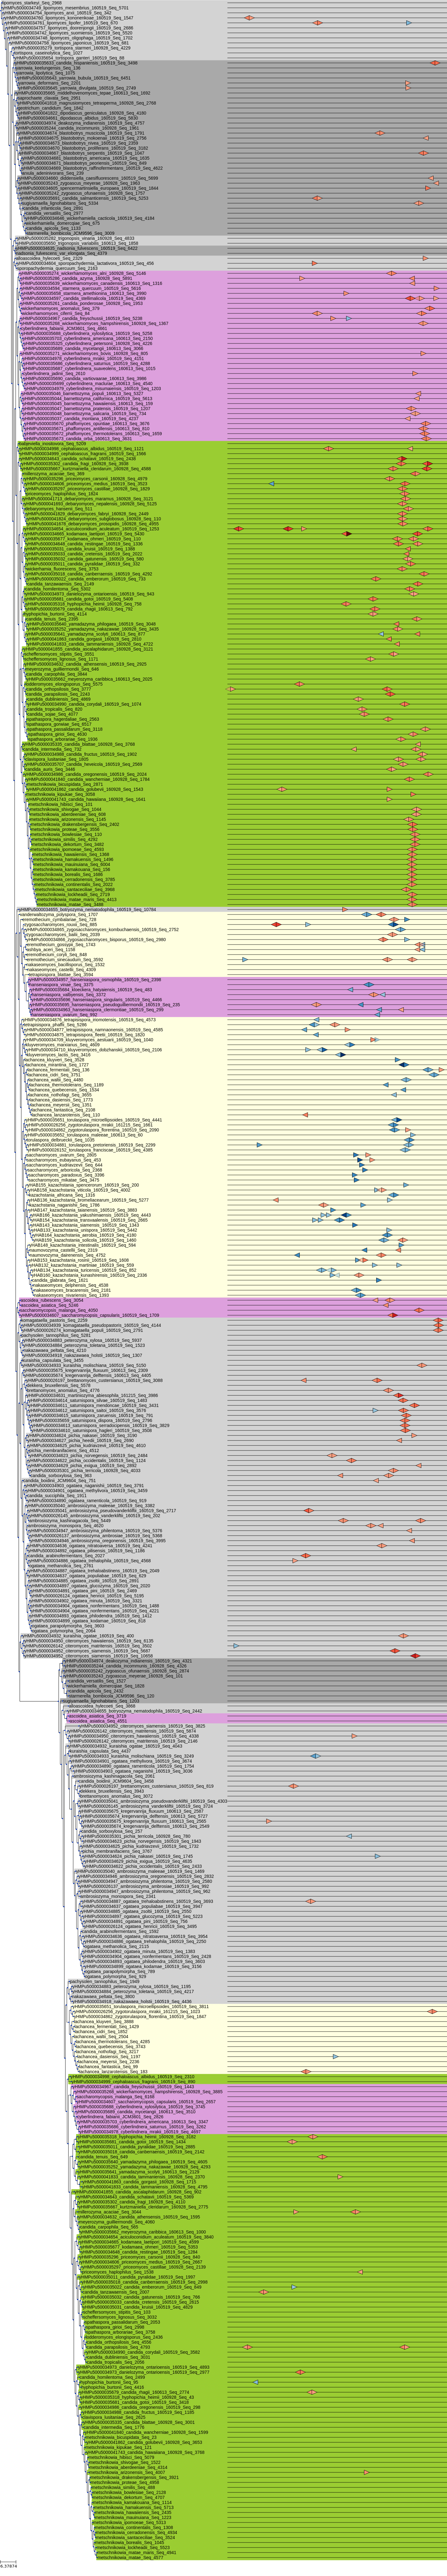

In [343]:
## add motifs to the same promoter image 

#Visualize the tree with promoter binding sites localized for LYS4

goi_common_name =  'LYS4'
goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
og = goi_og_lookup[goi_y1000_id]
# og_genes = og_genes_lookup[og]

sacc_families = {'Candida': 'Post_WGH',
                 'Kazachstania': 'Post_WGH',
                 'Nakaseomyces': 'Post_WGH',
                 'Naumovozyma': 'Post_WGH',
                 'Saccharomyces': 'Post_WGH',
                 'Tetrapisispora': 'Post_WGH',
                 'Vanderwaltozyma': 'Post_WGH',
                 'Yueomyces': 'Post_WGH',
                 'Zygosaccharomyces': 'ZT',
                 'Zygotorulaspora': 'ZT',
                 'Torulaspora': 'ZT',
                 'Kluyveromyces': 'KLE',
                 'Lachancea': 'KLE',
                 'Eremothecium': 'KLE',
                 'Ashbya': 'KLE'
                }


#less_nonsacc=False    #flag for filtering some species

#Color Node by species: 
# sacc_colors = {'KLE': "#C6AFE9", 
#                'ZT': "YellowGreen",
#                'Post_WGH': "LightYellow"
#               }

# maj_clade_colors = {'Saccharomycodaceae': "BlanchedAlmond",
#     'Phaffomycetaceae': "Bisque",
#     'CUG-Ser2': 'NavajoWhite',
#     'CUG-Ser1': "Wheat",
#     'Pichiaceae': "BurlyWood",
#     'CUG-Ala':"Tan"
#     }

#pre_wgd_purple = "#bb95d6"

outgroup_color = 'lightgray'
between_color = 'plum'
maj_clade_colors = {'Saccharomycetaceae': "LightYellow",
    'Saccharomycodaceae': between_color,
    'Phaffomycetaceae': between_color,
    'CUG-Ser2': between_color,
    'CUG-Ser1': "YellowGreen",
    'Pichiaceae': outgroup_color,
    'CUG-Ala': outgroup_color,
    'Lipomycetaceae': outgroup_color, 
    'Trigonopsidaceae': outgroup_color, 
    'Dipodascaceae/Trichomonascaceae': 'darkgray',   #outgroup
    'Alloascoideaceae': outgroup_color, 
    'Sporopachydermia clade': outgroup_color
    }


protein_fname_base = y1000plus_dir + os.path.normpath('proteins_og/' + goi_common_name + '_' + og)
tree_fname = protein_fname_base + '_aln_trimmed.fasta.treefile'
t = Tree(tree_fname)
t.ladderize()
L_prom = 700
height = 15
seq = '-'*L_prom


cmap_base = {'GCN4': 'Reds', 'LYS14': 'Blues'}
cmap_low_cutoff = 0.2

cmaps = {}
for motif_name, cmap_base_name in cmap_base.items():
    cmap = cm.get_cmap(cmap_base_name)
    cmap_trunc = colors.LinearSegmentedColormap.from_list(cmap_base_name + '_' + 'trunc', cmap(np.linspace(cmap_low_cutoff,1.0,100)))
    cmaps[motif_name] = cmap_trunc

#(length, thresh)
motif_params = {'GCN4': (16,-np.log10(2.0e-4)), 'LYS14': (16,-np.log10(1.79e-05))}


found_motifs_dict = {}
for node in t.iter_leaves():  
    found_motifs_dict[node.name]=[]

    
cmap_norm_score = {}
for motif_name, (motif_len, motif_score_thresh) in motif_params.items(): 
    print(motif_name)
    fimo_hits = pd.read_table(y1000plus_dir + 'fimo_results/' + og + '_' + goi_common_name + '_' + motif_name + '_fimo.tsv',
                         engine='python', skipfooter=4)

    #set up colormap
    cmap_score = cmaps[motif_name]
    
    pvals_nlog10 = -np.log10(fimo_hits['p-value'])
    vmin = min(pvals_nlog10)
    vmax = max(pvals_nlog10)
    norm_score = colors.Normalize(vmin=vmin, vmax=vmax)
    
    cmap_norm_score[motif_name] = (cmap_score, norm_score)

    #For each node in the tree:
    for node in t.iter_leaves():  
        #Get the promoter sequence with motif info, make it into a motif list
        species = '_'.join(node.name.split('_')[:-2])
        #here gene_id includes the species
        gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])

        #color node by major clade / family if in Sacch clade
        species = '_'.join(node.name.split('_')[:-2])
        row = y1000_species_subset[y1000_species_subset['original_genome_id']==species]
        maj_clade = row['Major clade'].values[0]

#         if maj_clade == 'Saccharomycetaceae':
#             genus = row['Genus'].values[0]
#             node_color = sacc_colors[sacc_families[genus]]
#         elif species == 'yarrowia_lipolytica':
#         #elif species == 'hanseniaspora_vinae':
#             node_color = 'LightGrey'
#        else: 
        node_color = maj_clade_colors[maj_clade]

        nstyle = NodeStyle()
        nstyle['bgcolor']=node_color
        node.set_style(nstyle)

        y1000_id = gene_id_to_y1000_id[gene_id] 

        if y1000_id in set(fimo_hits['sequence_name']): 
            hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]

            for hit in hits.iterrows():
                direction = hit[1]['strand']
                shape = '>'
                start = hit[1]['start']
                stop = hit[1]['start'] + motif_len
                if direction == '-':
                    shape = '<'
                    start = hit[1]['start']-motif_len
                    stop = hit[1]['start']
                pval_neglog10 = -np.log10(hit[1]['p-value'])
                if pval_neglog10>motif_score_thresh: 
                    rgb = colors.to_hex(cmap_score(norm_score(pval_neglog10)))
                    found_motifs_dict[node.name].append([start,stop,shape,None, height, "black", rgb, None])



for node in t.iter_leaves():  
    seqFace = SeqMotifFace(seq, motifs=found_motifs_dict[node.name], seq_format="-")
    node.add_face(seqFace, column=0, position="aligned")
#     if gene_id == 'saccharomyces_uvarum@Seq_2805':
#         print(gene_id)
#         a = node
            

t.render('%%inline')
# fname = home_dir + 'scratch/' + goi_common_name + '.svg'
# t.render(fname)

In [140]:
#Checking individual promoters

motif_name = 'GCN4'
fimo_hits = pd.read_table(y1000plus_dir + 'fimo_results/' + og + '_' + goi_common_name + '_' + motif_name + '_fimo.tsv',
                         engine='python', skipfooter=4)
fimo_hits




motif_id motif_alt_id sequence_name  start  stop strand     score  \
0    MA0303.1         GCN4      198_5429    380   400      +  17.88890   
1    MA0303.1         GCN4      191_2437    556   576      +  16.60000   
2    MA0303.1         GCN4      173_1708    527   547      +  16.38890   
3    MA0303.1         GCN4     246_10657    599   619      -  16.33330   
4    MA0303.1         GCN4      287_3937    638   658      +  16.24440   
5    MA0303.1         GCN4      194_1252    193   213      -  16.16670   
6    MA0303.1         GCN4      186_3985    545   565      +  15.87780   
7    MA0303.1         GCN4      194_1252     35    55      -  15.66670   
8    MA0303.1         GCN4     246_10657    599   619      +  15.56670   
9    MA0303.1         GCN4       342_884    155   175      +  15.52220   
10   MA0303.1         GCN4      194_1252    193   213      +  15.48890   
11   MA0303.1         GCN4      306_4587    636   656      -  15.45560   
12   MA0303.1         GCN4       342_884    155   175      -  14.94440   
13   MA0303.1         GCN4      198_5429    606   626      -  14.93330   
14   MA0303.1         GCN4      194_1252     35    55      +  14.81110   
15   MA0303.1         GCN4      169_4368    583   603      -  14.80000   
16   MA0303.1         GCN4      306_4587    636   656      +  14.78890   
17   MA0303.1         GCN4      198_5429    606   626      +  14.71110   
18   MA0303.1         GCN4      246_5686    534   554      +  14.48890   
19   MA0303.1         GCN4      267_2716    259   279      -  14.47780   
20   MA0303.1         GCN4      246_5686    534   554      -  14.45560   
21   MA0303.1         GCN4      287_3937    638   658      -  14.41110   
22   MA0303.1         GCN4       24_2242    519   539      +  14.35560   
23   MA0303.1         GCN4       52_2258    672   692      +  14.27780   
24   MA0303.1         GCN4      198_5429    380   400      -  14.26670   
25   MA0303.1         GCN4       23_3776    509   529      -  14.21110   
26   MA0303.1         GCN4      194_1252    639   659      +  14.17780   
27   MA0303.1         GCN4       24_2242    519   539      -  14.05560   
28   MA0303.1         GCN4      169_4368    583   603      +  13.98890   
29   MA0303.1         GCN4      175_3430    596   616      +  13.94440   
..        ...          ...           ...    ...   ...    ...       ...   
896  MA0303.1         GCN4      265_4236    619   639      -   4.68889   
897  MA0303.1         GCN4      225_1522    492   512      +   4.68889   
898  MA0303.1         GCN4       67_2435    381   401      +   4.67778   
899  MA0303.1         GCN4      191_5368    283   303      -   4.66667   
900  MA0303.1         GCN4       57_1428    378   398      -   4.66667   
901  MA0303.1         GCN4      207_1039     16    36      -   4.65556   
902  MA0303.1         GCN4      207_1039     16    36      +   4.65556   
903  MA0303.1         GCN4      264_2614    468   488      +   4.65556   
904  MA0303.1         GCN4       60_1350     57    77      +   4.64444   
905  MA0303.1         GCN4      256_3581    636   656      -   4.63333   
906  MA0303.1         GCN4       54_1851    504   524      +   4.63333   
907  MA0303.1         GCN4      207_1039    509   529      -   4.62222   
908  MA0303.1         GCN4       30_2055    548   568      -   4.62222   
909  MA0303.1         GCN4      189_3953    372   392      +   4.61111   
910  MA0303.1         GCN4      305_1691    607   627      +   4.61111   
911  MA0303.1         GCN4      336_4794    560   580      -   4.60000   
912  MA0303.1         GCN4      315_1433    280   300      +   4.60000   
913  MA0303.1         GCN4      153_2664    454   474      -   4.58889   
914  MA0303.1         GCN4       254_297    114   134      +   4.57778   
915  MA0303.1         GCN4       28_2148    347   367      +   4.57778   
916  MA0303.1         GCN4      262_4828    473   493      +   4.57778   
917  MA0303.1         GCN4       34_2825    244   264      +   4.56667   
918  MA03

In [143]:
#gene_id = 'dekkera_bruxellensis@Seq_5578'
#gene_id = 'saccharomyces_mikatae@Seq_3475'
#gene_id = 'torulaspora_delbrueckii@Seq_1035'
#gene_id = 'saccharomyces_arboricola@Seq_2368'
gene_id = 'candida_dubliniensis@Seq_4869'
y1000_id = gene_id_to_y1000_id[gene_id] 
    
hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]
hits

motif_id motif_alt_id sequence_name  start  stop strand    score  \
290  MA0303.1         GCN4       18_4868    417   437      -  9.46667   
293  MA0303.1         GCN4       18_4868    417   437      +  9.42222   
476  MA0303.1         GCN4       18_4868    447   467      +  7.70000   
728  MA0303.1         GCN4       18_4868    447   467      -  5.70000   

      p-value  q-value       matched_sequence  
290  0.000123    0.291  CCGTGAATGAGTCAGTAGTTT  
293  0.000126    0.294  AAACTACTGACTCATTCACGG  
476  0.000302    0.437  CGATACAGGAGTCACAAAAAT  
728  0.000658    0.619  ATTTTTGTGACTCCTGTATCG

LYS14
GCN4


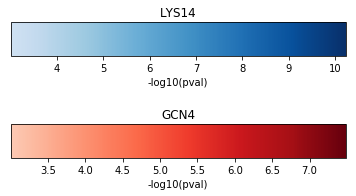

In [212]:
fig, axarr = plt.subplots(2,1, figsize=(6, 1))
#fig.subplots_adjust(bottom=0.5)

jj = 0
for motif_name, (cmap, norm) in cmap_norm_score.items(): 
    print(motif_name)
    ax = axarr[jj] 
    cb1 = colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    cb1.set_label('-log10(pval)')
    ax.set_title(motif_name)
    jj = jj + 1

fig.subplots_adjust(hspace=2, bottom = -1)
#fig.save(home_dir + 'scratch/' + goi_common_name + '_colorbar.svg')

### Put lys14 sequences in phylogenetic order

In [168]:
#build series mapping each protein name to species names
##Note I ended up just using Jalview for this

leaf_names = t.get_leaf_names()

leaf_specs = []

for leaf_name in leaf_names: 
    if 'saccharomyces_cerevisiae' in leaf_name:
        leaf_specs.append('saccharomyces_cerevisiae')
    elif 'candida_albicans' in leaf_name:
        leaf_specs.append('candida_albicans')
    else:
        spec = leaf_name.split('_Seq_')[0]
        leaf_specs.append(spec)
name_spec_map = pd.Series(leaf_specs, index=leaf_names)
# a[a=='saccharomyces_cerevisiae'].index[0]

'saccharomyces_cerevisiae_YDR034C'

In [158]:
goi_common_name = 'LYS14'
goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
og = goi_og_lookup[goi_y1000_id]





protein_fname_base = y1000plus_dir + os.path.normpath('proteins_og/' + goi_common_name + '_' + og)
tree_fname = protein_fname_base + '_aln_trimmed.fasta.treefile'
t = Tree(tree_fname)
t.ladderize()




# outgroup_color = 'lightgray'
# between_color = 'plum'
# maj_clade_colors = {'Saccharomycetaceae': "LightYellow",
#     'Saccharomycodaceae': between_color,
#     'Phaffomycetaceae': between_color,
#     'CUG-Ser2': between_color,
#     'CUG-Ser1': "YellowGreen",
#     'Pichiaceae': outgroup_color,
#     'CUG-Ala': outgroup_color,
#     'Lipomycetaceae': outgroup_color, 
#     'Trigonopsidaceae': outgroup_color, 
#     'Dipodascaceae/Trichomonascaceae': 'darkgray',   #outgroup
#     'Alloascoideaceae': outgroup_color, 
#     'Sporopachydermia clade': outgroup_color
#     }

ca_cousins = t.get_common_ancestor(['Candida_albicans', 'Candida_parapsilosis']).get_leaves()
ca_cousins_names = [node.name for node in ca_cousins]
ca_cousins_color = "#f9e284"

sc_cousins = t.get_common_ancestor(['Vanderwaltozyma_polyspora', 'Saccharomyces_cerevisiae']).get_leaves()
sc_cousins_names = [node.name for node in sc_cousins]
sc_cousins_color = "#aad1ef"

#color node by major clade 
#Get the promoter sequence with motif info, make it into a motif list

for node in t.iter_leaves():
    row = y1000_species[y1000_species['species_names_fig2']==node.name]
    maj_clade = row['Major clade'].values[0]
    genus = row['Genus'].values[0]
    hex_color = row['hex'].values[0]
    
    node_color = hex_color
    if node.name in sc_cousins_names:
        node_color = sc_cousins_color
    elif node.name in ca_cousins_names:
        node_color = ca_cousins_color
        
        
    
    
    nstyle = NodeStyle()
    nstyle['bgcolor']=node_color
    node.set_style(nstyle)
    
    
    

t.render('%%inline')

# fname = home_dir + 'scratch/colored_species_tree.svg'
# t.render(fname)






# root_point = t2.get_leaves_by_name("Saccharomyces_cerevisiae")[0]
# t2.set_outgroup(root_point)
# root 'sugiyamaella_lignohabitans'
# 


# L_prom = 700
# height = 15
# seq = '-'*L_prom

ValueError: Node names not found: ['Candida_albicans', 'Candida_parapsilosis']

In [ ]:


outgroup_color = 'lightgray'
between_color = 'plum'
maj_clade_colors = {'Saccharomycetaceae': "LightYellow",
    'Saccharomycodaceae': between_color,
    'Phaffomycetaceae': between_color,
    'CUG-Ser2': between_color,
    'CUG-Ser1': "YellowGreen",
    'Pichiaceae': outgroup_color,
    'CUG-Ala': outgroup_color,
    'Lipomycetaceae': outgroup_color, 
    'Trigonopsidaceae': outgroup_color, 
    'Dipodascaceae/Trichomonascaceae': 'darkgray',   #outgroup
    'Alloascoideaceae': outgroup_color, 
    'Sporopachydermia clade': outgroup_color
    }

ca_cousins = t.get_common_ancestor(['Candida_albicans', 'Candida_parapsilosis']).get_leaves()
ca_cousins_names = [node.name for node in ca_cousins]
ca_cousins_color = "#f9e284"

sc_cousins = t.get_common_ancestor(['Vanderwaltozyma_polyspora', 'Saccharomyces_cerevisiae']).get_leaves()
sc_cousins_names = [node.name for node in sc_cousins]
sc_cousins_color = "#aad1ef"

#color node by major clade 
#Get the promoter sequence with motif info, make it into a motif list



for node in t.iter_leaves():
    row = y1000_species[y1000_species['species_names_fig2']==node.name]
    maj_clade = row['Major clade'].values[0]
    genus = row['Genus'].values[0]
    hex_color = row['hex'].values[0]
    
    node_color = hex_color
    if node.name in sc_cousins_names:
        node_color = sc_cousins_color
    elif node.name in ca_cousins_names:
        node_color = ca_cousins_color
        
        
    
    
    nstyle = NodeStyle()
    nstyle['bgcolor']=node_color
    node.set_style(nstyle)
    
    
    

#t.render('%%inline')

fname = home_dir + 'scratch/colored_species_tree.svg'
t.render(fname)


## Load all Metabolism genes

In [9]:
#NOtice how many of these genes are very close on the genome MPC3, SOL4, ENO1, GND2

aa_met_genes = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/aa_metabolism_genes.csv'), index_col=0)

list(aa_met_genes['Scer_gene'])

['ARO3',
 'ARO4',
 'ARO1',
 'ARO2',
 'ARO7',
 'TYR1',
 'ARO9',
 'ARO8',
 'TRP3',
 'TRP2',
 'TRP1',
 'TRP5',
 'PHA2',
 'ILV6',
 'ILV2',
 'ILV5',
 'ILV3',
 'LEU9',
 'LEU4',
 'BAT2',
 'BAT1',
 'LEU1',
 'LEU2',
 'ILV1',
 'MET3',
 'MET14',
 'MET16',
 'MET7',
 'MET5',
 'MET10',
 'MET17',
 'MET6',
 'MET2',
 'HOM3',
 'HOM2',
 'HOM6',
 'CYS4',
 'CYS3',
 'STR2',
 'SAM2',
 'SAM1',
 'STR3',
 'HIS1',
 'HIS4',
 'HIS6',
 'HIS7',
 'HIS3',
 'HIS5',
 'HIS2',
 'PRS5',
 'PRS1',
 'PRS3',
 'PRS2',
 'PRS4',
 'GLN1',
 'GLT1',
 'GDH1',
 'GDH3',
 'ALT1',
 'ARG5,6',
 'ARG8',
 'ARG7',
 'ARG3',
 'ARG1',
 'ARG4',
 'ARG2',
 'AAT2',
 'AAT1',
 'ASN1',
 'ASN2',
 'PYC1',
 'PYC2',
 'SER33',
 'SER3',
 'SER1',
 'SER2',
 'AGX1',
 'GLY1',
 'SHM2',
 'SHM1',
 'LYS21',
 'LYS20',
 'LYS4',
 'LYS12',
 'LYS2',
 'LYS9',
 'LYS1',
 'LYS14',
 'PRO1',
 'PRO2',
 'PRO3',
 'THR1',
 'THR4']

In [97]:
#make pathway list
pathway_table = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/scer_AABGs_pathways.csv'), index_col = 0)
all_pway_names = set()
for column in ['Pathway'+str(NN) for NN in range(1,5)]:
    all_pway_names = all_pway_names | (set(pathway_table[column]))

all_pway_names = all_pway_names - {np.nan}

all_pways = {pway : [] for pway in all_pway_names}


for (genename, (common_name, pway1,pway2, pway3, pway4)) in pathway_table.iterrows():
    for pway in [pway1,pway2, pway3, pway4]:
        if isinstance(pway, str):
            all_pways[pway].append(common_name)

            
#Combine overlapping pathways
all_pways['bcaa'] = list(set(all_pways['leu'] + all_pways['ile'] + all_pways['val'] + all_pways['branched']))
all_pways['aromatic'] = list(set(all_pways['chorismate'] + all_pways['phe'] + all_pways['trp'] + all_pways['tyr']))
all_pways['cys_met_thr'] = list(set(all_pways['homoserine']+all_pways['met']+all_pways['cys']+all_pways['thr']))

all_pways_combined_keys = list(set(all_pways.keys()) - set(['leu','ile','val','branched','chorismate','phe','trp','tyr','homoserine','met','cys','thr']))

all_pways_combined = {}
for pway in all_pways_combined_keys: 
    all_pways_combined[pway] = all_pways[pway]

all_pways_combined



{'arg': ['ARG1', 'ARG2', 'ARG3', 'ARG4', 'ARG5,6', 'ARG7', 'ARG8'],
 'aromatic': ['ARO4',
  'TRP1',
  'ARO8',
  'TRP2',
  'PHA2',
  'ARO7',
  'TRP3',
  'TYR1',
  'ARO2',
  'ARO3',
  'ARO1',
  'TRP5',
  'ARO9'],
 'asn': ['ASN2'],
 'asp': ['AAT1', 'AAT2', 'PYC2'],
 'bcaa': ['ILV6',
  'LEU4',
  'BAT2',
  'ILV1',
  'ILV3',
  'ILV2',
  'LEU2',
  'LEU1',
  'ILV5'],
 'cys_met_thr': ['MET16',
  'MET7',
  'HOM6',
  'MET17',
  'CYS3',
  'THR4',
  'MET5',
  'CYS4',
  'MET6',
  'MET2',
  'MET14',
  'THR1',
  'MET10',
  'HOM2',
  'MET3',
  'HOM3'],
 'gln': ['GLN1'],
 'glu': ['ALT1', 'GDH3', 'GLT1'],
 'gly': ['AGX1', 'GLY1'],
 'his': ['HIS1',
  'HIS2',
  'HIS3',
  'HIS4',
  'HIS5',
  'HIS6',
  'HIS7',
  'PRS1',
  'PRS3',
  'PRS4',
  'PRS5'],
 'lys': ['LYS1', 'LYS12', 'LYS2', 'LYS21', 'LYS4', 'LYS5', 'LYS9'],
 'pro': ['PRO1', 'PRO2', 'PRO3'],
 'ser': ['SER1', 'SER2', 'SER3', 'SHM1', 'SHM2']}

In [22]:
##Checking to see if any of the metabolism genes are in my differentially regulated paralog set
fname = home_dir +  os.path.normpath('/github/expression_broad_data/expression_data/kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

ohnologs_goi.set_index('Ancestor', inplace=True)
ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
ohnologs_goi.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']},inplace=True)


In [25]:
(set(ohnologs_goi['genename_low']) | set(ohnologs_goi['genename_high'])) & set(aa_met_genes.index)
#set([item[0] for item in list(aa_met_genes.values)])

{'YAL062W', 'YOR375C'}

## Look for all GCN4 / LYS14 motif hits in a large set of genes

In [11]:
goi_groups = {'met': ['MET3',
                     'MET14',
                     'MET16',
                     'MET7',
                     'MET5',
                     'MET10',
                     'MET17',
                     'MET6',
                     'MET2'], 
              'lys': ['LYS21',
                     #'LYS20',
                     #'LYS4',
                     'LYS12',
                     'LYS5'
                     'LYS2',
                     'LYS9',
                     'LYS1',
                     'LYS14']}

goi_groups['bcaa'] = list(set(all_pways['leu'] + all_pways['ile'] + all_pways['val']))
goi_groups['arg'] = all_pways['arg']



In [171]:
aa_met_genes = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/aa_metabolism_genes.csv'), index_col=0)


In [172]:
y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

#not including outgroup species
y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']

# #Select only clades of interest: 
# clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
# #clades_of_interest = {'Saccharomycetaceae'}
# y1000_species_subset = y1000_species[y1000_species['Major clade'].isin(clades_of_interest)]

outgroup = 'Lipomyces starkeyi'
outgroup_orig_genome = y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'].values[0]
#'Yarrowia lipolytica'
# #outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
# y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])


In [173]:

gois = list(aa_met_genes.index)

#Make promoter files for various genes of interest
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]

goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

more than one goi in same orthogroup :OG1030 found_genes: 
['110_4199', '110_4697']
more than one goi in same orthogroup :OG1096 found_genes: 
['110_946', '110_4987']
more than one goi in same orthogroup :OG1115 found_genes: 
['110_449', '110_827']
more than one goi in same orthogroup :OG1210 found_genes: 
['110_425', '110_1406']
more than one goi in same orthogroup :OG1313 found_genes: 
['110_447', '110_3134']
more than one goi in same orthogroup :OG1433 found_genes: 
['110_2626', '110_634']
more than one goi in same orthogroup :OG1516 found_genes: 
['110_4813', '110_695']
more than one goi in same orthogroup :OG1675 found_genes: 
['110_4331', '110_1965']
more than one goi in same orthogroup :OG1892 found_genes: 
['110_2273', '110_217']
more than one goi in same orthogroup :OG2588 found_genes: 
['110_4392', '110_1713']


In [215]:
#Only need to do once
#Extract promoters for all gois 
L_prom = 700
for goi_group_name in ['arg']: #['lys', 'met']:
    for goi_common_name in goi_groups[goi_group_name]:
        print(goi_common_name)
        goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
        goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
        og = goi_og_lookup[goi_y1000_id]
        og_genes = og_genes_lookup[og]


        #For a given orthogroup extract promoters
        og_genes_y1000_gene_id = y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_common_name)
        print(goi_common_name + ' promoter extraction complete')

ARG1
promoter region extends past the scaffold, genome_name = yHMPu5000034594_starmera_quercuum_160519 Gene = Seq_5668, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000035687_cyberlindnera_suaveolens_160613 Gene = Seq_3415, L_prom = 700
12_1101
ARG1 promoter extraction complete
ARG2
promoter region extends past the scaffold, genome_name = yHMPu5000035670_phaffomyces_opuntiae_160613 Gene = Seq_1633, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000035670_phaffomyces_opuntiae_160613 Gene = Seq_783, L_prom = 700
12_4549
ARG2 promoter extraction complete
ARG3
promoter region extends past the scaffold, genome_name = yHMPu5000034952_citeromyces_siamensis_160519 Gene = Seq_12557, L_prom = 700
12_1177
ARG3 promoter extraction complete
ARG4
promoter region extends past the scaffold, genome_name = spathaspora_gorwiae Gene = Seq_5074, L_prom = 700
promoter region extends past the scaffold, genome_name = yHAB155_kazachstania_spencerorum_

In [217]:
#For each goi set, find motifs in each promoter, store data 
#Extract promoters for all gois 

#Key: y1000_id

#fields: species, gene_id, MOTIF_count, MOTIF_loc, MOTIF_score, MOTIF_context

#(thresh, motif_fname, motif_in_file)
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme', 'All'),
                    'LYS14':(1e-4, home_dir + 'github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme', 'All'),
                    'LEU3': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/LEU3_jaspar_MA0324.1.meme','All'), 
                    'ARG81': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme', 'All'),
                    'MET32': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/MET32_jaspar_MA0333.1.meme', 'All')
                   }

Lprom_thresh=50

fig2_to_orig = dict(zip(y1000_species_subset['species_names_fig2'], y1000_species_subset['original_genome_id']))
motif_names =  motif_hit_params.keys()

#set up data matrix based on time-calibrated species tree, and take subset of species based on species subset
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)
t.ladderize()

genome_names = []
fig2_names = []
for node in t.iter_leaves():  
    #node.name is species_names_fig2
    #convert to original_genome_id
    genome_name = fig2_to_orig[node.name]
    if genome_name in set(y1000_species_subset['original_genome_id']):
        genome_names.append(genome_name)
        fig2_names.append(node.name)
    
species_data_matrix = pd.DataFrame.from_dict({'original_genome_id':genome_names, 'species_names_fig2': fig2_names})
species_data_matrix.set_index('species_names_fig2', inplace=True)


for goi_group_name in ['lys', 'met', 'bcaa', 'arg']:
    for goi_common_name in goi_groups[goi_group_name]:
        #goi_common_name = 'LYS4'
        print(goi_common_name)      
        goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
        goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
        og = goi_og_lookup[goi_y1000_id]

        #Convert file name for use with FIMO, also make dictionary to get gene_id and length of promoters
        fname_in = '/home/heineike/genomes/y1000plus/promoter_sets/' + og + '_' + goi_common_name + '.fasta'
        y1000_id_to_gene_id, y1000_id_to_Lprom = y1000plus_tools.convert_promoters_for_fimo(fname_in)

        #Make dataframe to store hits
        goi_hits = pd.DataFrame.from_dict(y1000_id_to_gene_id, orient='index', columns = ['species', 'gene_id'])
        y1000_id_to_Lprom_df = pd.DataFrame.from_dict(y1000_id_to_Lprom, orient='index', columns = ['Lprom'])
        goi_hits = goi_hits.merge(y1000_id_to_Lprom_df, how = 'outer', left_index=True, right_index=True)



        #Run FIMO and load results
        promoters_prefix = og + '_' + goi_common_name
        for motif_name, (thresh, motif_fname, motif_in_file) in motif_hit_params.items(): 
            fimo_hits = y1000plus_tools.promoter_scan_fimo(promoters_prefix, motif_name, motif_fname, thresh)

            goi_hits_motif = {}

            for y1000_id in goi_hits.index: 
                prom_Lprom = y1000_id_to_Lprom[y1000_id]
                prom_hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]
                locs = []
                strands = []
                pvals = []
                seqs = []

                for prom_hit in prom_hits.iterrows():
                    #Just recording location of the start of the motif
                    strand = prom_hit[1]['strand']
                    strands.append(strand)
                    if strand == '-':
                        locs.append(prom_Lprom-prom_hit[1]['stop'])
                    elif strand == '+': 
                        locs.append(prom_Lprom-prom_hit[1]['start'])
                    seqs.append(prom_hit[1]['matched_sequence'])
                    pvals.append(prom_hit[1]['p-value'])

                goi_hits_motif[y1000_id]=(locs, strands, pvals, seqs)

            goi_hits_motif_df = pd.DataFrame.from_dict(goi_hits_motif, orient='index', columns = ['location', 'strand','pval','sequence'])

            goi_hits = goi_hits.merge(goi_hits_motif_df, how='outer', left_index=True, right_index=True)
            goi_hits.rename(columns={col : col + '_' + motif_name for col in ['location', 'strand', 'pval','sequence']}, inplace=True)


        N_orth = []

        min_motif_pval = {motif_name:[] for motif_name in motif_names}

        for genome_name in species_data_matrix['original_genome_id']:   
            spec_proms = goi_hits[goi_hits['species']==genome_name]
            #Could add length filter here

            N_orth_spec = len(spec_proms.index)
            N_orth.append(N_orth_spec)
            if N_orth_spec==0:  
                print('No orthologs for ' + goi_common_name + ', species ' + genome_name)
                for motif_name in motif_names: 
                    min_motif_pval[motif_name].append('NO_ORTH')

            else: 
                #If one or more orthologs, cycles through and keeps min motif_pval.  
                for motif_name in motif_names: 
                    min_motif_pval_spec = np.inf
                    short = True
                    for orth in spec_proms.iterrows():
                        pval_list = orth[1]['pval_' + motif_name]
                        if orth[1]['Lprom']>Lprom_thresh:  #if any of the orthologs have a long enough promoter, the short flag is turned off
                            short = False  
                    
                        if len(pval_list)!=0: 
                            min_motif_pval_spec = min(min_motif_pval_spec, min(pval_list))
                    
                    if short: 
                        print(goi_common_name + ' ' + orth[1]['species'] + ' Lprom too short.')
                        min_motif_pval[motif_name].append('short_promoters')
                    elif min_motif_pval_spec==np.inf: 
                        min_motif_pval[motif_name].append(None)
                    else:
                        min_motif_pval[motif_name].append(-np.log10(min_motif_pval_spec))  #take -log10(pval) in this step

        species_data_matrix[goi_common_name + '_N_orth'] = N_orth
        for motif_name in motif_names:
            species_data_matrix[goi_common_name + '_' + motif_name] = min_motif_pval[motif_name]

species_data_matrix.to_csv(base_dir + os.path.normpath('data/gcn4_liron/20190520_lys_met_bcaa_genes_gcn4_lys14'))
    

LYS21
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1096_LYS21_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1096_LYS21_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1096_LYS21_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc

fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/LEU3_jaspar_MA0324.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1935_LYS9_fimo.fasta
fimo output return code = 0
LYS9 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
LYS9 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
LYS9 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
LYS9 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
LYS9 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
No orthologs for LYS9, species spathaspora_girioi
LYS1
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_se

MET3
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2365_MET3_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2365_MET3_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2365_MET3_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /ho

MET7
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2126_MET7_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2126_MET7_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2126_MET7_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /ho

fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1944_MET17_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1944_MET17_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1944_MET17_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home

fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/MET32_jaspar_MA0333.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1115_LEU4_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/LEU3_jaspar_MA0324.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1115_LEU4_fimo.fasta
fimo output return code = 0
BAT2
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1210_BAT2_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/m

fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2577_ILV6_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2577_ILV6_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/MET32_jaspar_MA0333.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2577_ILV6_fimo.fasta
fimo output return code = 0
fimo command:
/hom

No orthologs for ILV3, species saccharomyces_paradoxus
ILV3 yHMPu5000034952_citeromyces_siamensis_160519 Lprom too short.
ILV3 yHMPu5000034952_citeromyces_siamensis_160519 Lprom too short.
ILV3 yHMPu5000034952_citeromyces_siamensis_160519 Lprom too short.
ILV3 yHMPu5000034952_citeromyces_siamensis_160519 Lprom too short.
ILV3 yHMPu5000034952_citeromyces_siamensis_160519 Lprom too short.
No orthologs for ILV3, species yHMPu5000034612_saturnispora_saitoi_160519
No orthologs for ILV3, species yHMPu5000034615_saturnispora_zaruensis_160519
No orthologs for ILV3, species yHMPu5000035659_saturnispora_dispora_160519
No orthologs for ILV3, species yHMPu5000034610_saturnispora_hagleri_160519
No orthologs for ILV3, species yHMPu5000034613_saturnispora_serradocipensis_160519
ILV5
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineik

fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/LEU3_jaspar_MA0324.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1617_ARG3_fimo.fasta
fimo output return code = 0
ARG3 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
ARG3 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
ARG3 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
ARG3 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
ARG3 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
No orthologs for ARG3, species hanseniaspora_valbyensis
ARG3 yHMPu5000034631_martiniozyma_abiesophila_161215 Lprom too short.
ARG3 yHMPu5000034631_martiniozyma_abiesophila_161215 Lprom too short.
ARG3 yHMPu5000034631_martiniozyma_abiesophila_161215 Lprom too short.
ARG3 yHMPu5000034631_martiniozyma_abiesophila_161215 Lprom too short.

fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/MET32_jaspar_MA0333.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2200_ARG8_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/LEU3_jaspar_MA0324.1.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2200_ARG8_fimo.fasta
fimo output return code = 0
No orthologs for ARG8, species yHMPu5000035654_tortispora_ganteri_160519
No orthologs for ARG8, species tortispora_caseinolytica
ARG8 hanseniaspora_valbyensis Lprom too short.
ARG8 hanseniaspora_valbyensis Lprom too short.
ARG8 hanseniaspora_valbyensis Lprom too short.
ARG8 hanseniaspora_valbyensis Lprom too short.
ARG8 hanseniaspora_valby

In [ ]:
# plt.figure(1)     
# ax = plt.subplot(111)
# ax.bar(Xs, Ys, color="grey", width=1)
# ax.set_xticks([i + .5 for i in range(0, count)])
# ax.set_xticklabels(Xlabs, rotation=270)

# colors = ['b', 'r', 'g']
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)

In [191]:
#Load species_data_matrix and tree
species_data_matrix = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/20190520_lys_met_bcaa_genes_gcn4_lys14'), index_col=0)

#set up data matrix based on time-calibrated species tree, and take subset of species based on species subset
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)
t.ladderize()


332

In [23]:


outgroup_color = 'lightgray'
between_color = 'plum'
maj_clade_colors = {'Saccharomycetaceae': "LightYellow",
    'Saccharomycodaceae': between_color,
    'Phaffomycetaceae': between_color,
    'CUG-Ser2': between_color,
    'CUG-Ser1': "YellowGreen",
    'Pichiaceae': outgroup_color,
    'CUG-Ala': outgroup_color,
    'Lipomycetaceae': outgroup_color, 
    'Trigonopsidaceae': outgroup_color, 
    'Dipodascaceae/Trichomonascaceae': 'darkgray',   #outgroup
    'Alloascoideaceae': outgroup_color, 
    'Sporopachydermia clade': outgroup_color
    }

ca_cousins = t.get_common_ancestor(['Candida_albicans', 'Candida_parapsilosis']).get_leaves()
ca_cousins_names = [node.name for node in ca_cousins]
ca_cousins_color = "#f9e284"

sc_cousins = t.get_common_ancestor(['Vanderwaltozyma_polyspora', 'Saccharomyces_cerevisiae']).get_leaves()
sc_cousins_names = [node.name for node in sc_cousins]
sc_cousins_color = "#aad1ef"

#color node by major clade 
#Get the promoter sequence with motif info, make it into a motif list



for node in t.iter_leaves():
    row = y1000_species[y1000_species['species_names_fig2']==node.name]
    maj_clade = row['Major clade'].values[0]
    genus = row['Genus'].values[0]
    hex_color = row['hex'].values[0]
    
    node_color = hex_color
    if node.name in sc_cousins_names:
        node_color = sc_cousins_color
    elif node.name in ca_cousins_names:
        node_color = ca_cousins_color
        
        
    
    
    nstyle = NodeStyle()
    nstyle['bgcolor']=node_color
    node.set_style(nstyle)
    
    
    

#t.render('%%inline')

fname = home_dir + 'scratch/colored_species_tree.svg'
t.render(fname)


{'faces': [[243.99964374310227,
   3569.0,
   404.9996437431023,
   3585.0,
   449,
   'Saturnispora_mendoncae'],
  [240.99973280732667,
   4609.0,
   374.99973280732667,
   4625.0,
   578,
   'Candida_dubliniensis'],
  [195.99951014676554,
   145.0,
   330.99951014676554,
   161.0,
   21,
   'Trigonopsis_variabilis'],
  [195.99951014676554,
   161.0,
   316.99951014676554,
   177.0,
   22,
   'Trigonopsis_vinaria'],
  [195.99995546788787,
   177.0,
   369.99995546788784,
   193.0,
   24,
   'Botryozyma_nematodophila'],
  [225.99973280732672,
   4001.0,
   334.9997328073267,
   4017.0,
   502,
   'Candida_gorgasii'],
  [198.99951014676554,
   193.0,
   318.99951014676554,
   209.0,
   26,
   'Tortispora_starmeri'],
  [201.99968827521445,
   209.0,
   313.99968827521445,
   225.0,
   28,
   'Tortispora_ganteri'],
  [219.99982187155112,
   817.0,
   423.99982187155115,
   833.0,
   103,
   'Blastobotrys_raffinosifermentans'],
  [195.99982187155115, 33.0, 308.99982187155115, 49.0, 7, 'Lip

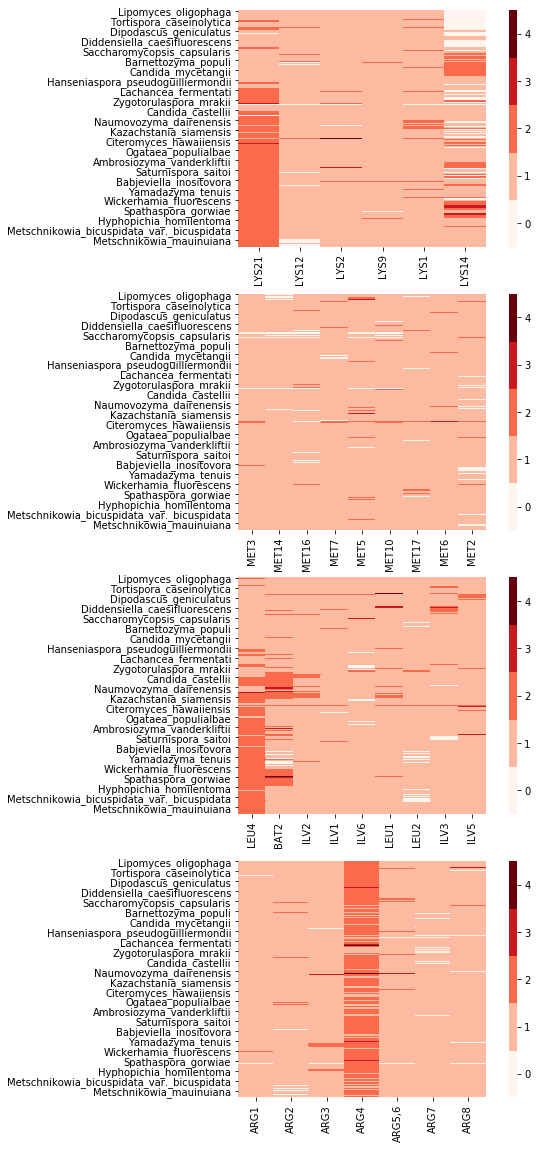

In [219]:
vmin = -0.5
vmax = 4.5
cmap = plt.cm.get_cmap('Reds', vmax+0.5)
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)

#cmap = sns.cm.rocket_r

# create the new map

cmap_new = colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

## For each goi group show the number of retained orthologs

# Create appropriately sized subplots
grid_kws = {'width_ratios': (0.9, 0.03), 'wspace': 0.18}
fig, axarr = plt.subplots(4, 2, gridspec_kw=grid_kws, figsize = (5,20))

for jj, goi_group_name in enumerate(['lys', 'met', 'bcaa', 'arg']):
    ax, cbar_ax = axarr[jj]
    columns_to_view = [goi_common_name + '_N_orth' for goi_common_name in goi_groups[goi_group_name]]
    sns.heatmap(species_data_matrix.loc[:,columns_to_view], ax=ax, cbar_ax=cbar_ax, cmap = cmap_new, vmin=vmin, vmax = vmax) #, cbar_kws=dict(ticks=list(range(int(vmax+0.5)))))
    cbar_ax.set_yticklabels([str(NN) for NN in range(int(vmax+0.5))])
    ax.set_xticklabels([goi_common_name for goi_common_name in goi_groups[goi_group_name]])
    ax.set_ylabel('')
#     #cbar = fig.axes[jj*2+1]
#     #cbar.set_ticks([val for val in range(int(vmax-0.5))])
#     #cbar.set_yticklabels([str(val) for val in range(int(vmax-0.5))], fontdict={"fontsize":14})
#     #ax.set_facecolor("grey")
    
#     ax.set_title(goi_group_name + ' genes, N Orthologs')

fig.savefig(home_dir + 'scratch/20190520_pway_genes_N_orth.svg')


In [ ]:

#species = 'Kluyveromyces_aestuarii'
motif_name = 'GCN4'
goi_group_name = 'lys'

columns_to_view = [goi_common_name + '_' + motif_name for goi_common_name in goi_groups[goi_group_name]]

data_matrix_raw = species_data_matrix.loc[:,columns_to_view]

data_matrix_raw.fillna(0.0, inplace=True)
data_matrix_raw.replace('NO_ORTH',-1, inplace=True)
data_matrix = data_matrix_raw.replace('short_promoters',-20)


#sns.heatmap(data_matrix)

#np.max(data_matrix)

#data_matrix.loc[species, :]

lys
LYS14
lys
MET32
lys
LEU3
lys
ARG81
lys
GCN4
met
LYS14
met
MET32
met
LEU3
met
ARG81
met
GCN4
bcaa
LYS14
bcaa
MET32
bcaa
LEU3
bcaa
ARG81
bcaa
GCN4
arg
LYS14
arg
MET32
arg
LEU3
arg
ARG81
arg
GCN4


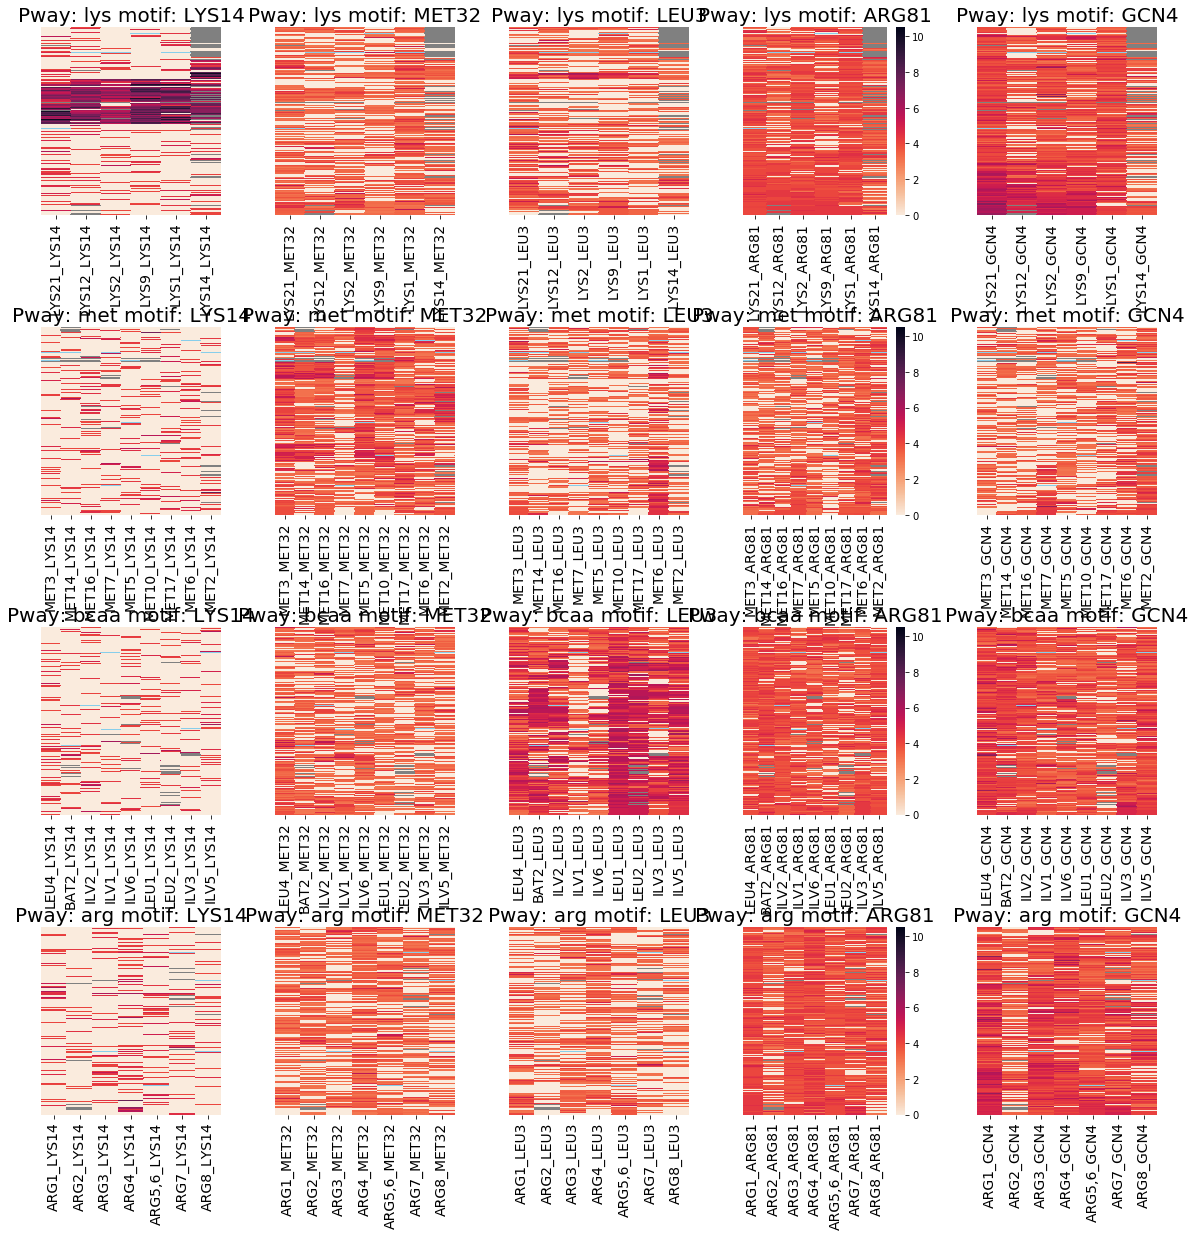

In [221]:
## Select out appropriate columns and visualize heatmap

motif_names =  ['LYS14','MET32', 'LEU3','ARG81', 'GCN4']

fig, axarr = plt.subplots(4,5, figsize=(20,20))
fig.subplots_adjust(wspace = 0.3, hspace = 0.6)

cmap = sns.cm.rocket_r
cmap.set_under('grey')
cmap.set_over('skyblue')
vmin=0.0
vmax = 10.5


for jj, goi_group_name in enumerate(['lys', 'met', 'bcaa', 'arg']):
    for kk, motif_name in enumerate(motif_names):
        print(goi_group_name)
        print(motif_name)       
        ax = axarr[jj,kk]
        show_cbar=False
        if kk==3:
            show_cbar=True
        
        columns_to_view = [goi_common_name + '_' + motif_name for goi_common_name in goi_groups[goi_group_name]]
        data_matrix_raw = species_data_matrix.loc[:,columns_to_view]
        data_matrix_raw.fillna(0, inplace=True)
        data_matrix_raw.replace('NO_ORTH',-1, inplace=True)
        data_matrix = data_matrix_raw.replace('short_promoters',20)
        data_matrix = data_matrix.apply(pd.to_numeric)  #not sure why numbers are suddenly strings
        sns.heatmap(data_matrix, ax=ax, cmap = sns.cm.rocket_r, vmin = vmin, vmax =vmax, cbar=show_cbar)
        ax.set_title('Pway: ' + goi_group_name + ' motif: '+ motif_name, fontdict={'size':20})
        ax.set_yticks([])
        #ax.set_xticklabels('')
        ax.set_xticklabels(ax.get_xticklabels(), fontdict = {'size':14}, rotation=90)
        ax.set_ylabel('')
#fig.savefig(home_dir + os.path.normpath('scratch/2019052`_lys_met_bcaa_arg_genes.svg'))

In [310]:
##Parse file to get C_albicans promoters. 
fname = base_dir + os.path.normpath('data/Calb_promoters/C_albicans_SC5314_A22_current_orf_genomic_1000.fasta')
seq_records = SeqIO.parse(fname, "fasta")

prom_dict = {}
for seq_record in seq_records:
    gene_id = seq_record.id
    prom_seq = seq_record.seq[0:1000]
    gene_seq = seq_record.seq[1000:-1000]
    prot_seq = gene_seq.translate()
    if len(prot_seq)==0: 
        print('Gene ' + gene_id + ' has protein sequence length 0')
    else: 
        if prot_seq[0] != 'M': 
            print('Gene ' + gene_id + ' does not start with a start codon')
        if prot_seq[-1] != '*': 
            print('Gene ' + gene_id + ' does not end with a stop codon')
        #Don't save these translations because it is a CUG/SER clade. 
    prom_dict[gene_id] = (str(prom_seq), str(gene_seq))

    
ca_promoters = pd.DataFrame.from_dict(prom_dict, orient='index', columns=['prom_seq', 'gene_seq'])

ca_proms_fname = base_dir + os.path.normpath('data/Calb_promoters/Calb_promoters.pkl')
with open(ca_proms_fname, 'wb') as f: 
    pickle.dump(ca_promoters, f)





/home/lab/envs/seqanalysis/lib/python3.5/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Gene C3_03580C_A does not end with a stop codon
Gene C4_00270W_B does not end with a stop codon
Gene C2_00260C_A does not end with a stop codon
Gene C2_08320C_B does not end with a stop codon
Gene C2_07530C_B does not end with a stop codon
Gene C1_11060C_A does not end with a stop codon
Gene CR_06690C_A does not end with a stop codon
Gene C2_04440W_A does not end with a stop codon
Gene C1_08840W_B does not end with a stop codon
Gene C4_06010C_B does not end with a stop codon
Gene C7_02610C_B does not end with a stop codon
Gene CR_05580C_A does not end with a stop codon
Gene C7_02610C_A does not end with a stop codon
Gene C2_05770W_B does not end with a stop codon
Gene C2_08300C_A does not end with a stop codon
Gene C1_11320C_A does not end with a stop codon
Gene C6_02930W_B does not end with a stop codon
Gene CR_08520C_B does not end with a stop codon
Gene C1_11030W_A does not end with a stop codon
Gene C1_06900C_B does not end with a stop codon
Gene C1_00280C_B does not start with a s

Gene C4_01480C_A does not end with a stop codon
Gene C2_05520W_B does not end with a stop codon
Gene C3_07560W_B does not end with a stop codon
Gene C1_14290C_A does not end with a stop codon
Gene C1_04520C_B does not end with a stop codon
Gene CR_01550C_A does not end with a stop codon
Gene C3_07430W_B does not end with a stop codon
Gene CR_06350C_A does not start with a start codon
Gene C6_01820C_A does not end with a stop codon
Gene CR_04550W_B does not end with a stop codon
Gene C7_02430C_B does not end with a stop codon
Gene C4_01270W_A does not end with a stop codon
Gene C6_01610W_B does not end with a stop codon
Gene C2_04110W_B does not end with a stop codon
Gene C5_03080C_B does not start with a start codon
Gene C5_04720C_B does not end with a stop codon
Gene C7_01610W_B does not end with a stop codon
Gene C1_03110W_A does not end with a stop codon
Gene CR_00820C_B does not end with a stop codon
Gene C5_01420W_A does not end with a stop codon
Gene C7_01850C_A does not end with

Gene CR_03420C_A does not end with a stop codon
Gene C1_10750C_A does not end with a stop codon
Gene C2_05900W_A does not end with a stop codon
Gene C5_03040W_B does not start with a start codon
Gene C5_01990W_A does not start with a start codon
Gene C2_06390C_B does not end with a stop codon
Gene C2_05410W_A does not end with a stop codon
Gene C1_00270W_A does not end with a stop codon
Gene CR_04020C_B does not end with a stop codon
Gene C4_05570C_A does not end with a stop codon
Gene C1_00710C_B does not end with a stop codon
Gene C3_07130W_B does not end with a stop codon
Gene C2_04770W_A does not end with a stop codon
Gene C2_08380C_A does not end with a stop codon
Gene C3_01890C_B does not end with a stop codon
Gene C1_10960W_A does not end with a stop codon
Gene C1_13590W_B does not end with a stop codon
Gene C3_01630W_B does not end with a stop codon
Gene C6_00970C_A does not start with a start codon
Gene C6_00970C_A does not end with a stop codon
Gene C1_09100W_A does not end w

Gene C5_03970W_B does not end with a stop codon
Gene CR_03010C_A does not end with a stop codon
Gene C1_12700W_B does not start with a start codon
Gene C6_01820C_B does not end with a stop codon
Gene C2_03340W_B does not end with a stop codon
Gene C1_06450C_A does not end with a stop codon
Gene CR_02530W_B does not end with a stop codon
Gene C1_00440W_B does not end with a stop codon
Gene C2_01880C_A does not end with a stop codon
Gene CR_01550C_B does not end with a stop codon
Gene C7_03180C_B does not end with a stop codon
Gene C4_04390W_A does not end with a stop codon
Gene CR_06350C_B does not start with a start codon
Gene C1_11060C_B does not end with a stop codon
Gene CR_03260W_A does not end with a stop codon
Gene CR_09440C_A does not end with a stop codon
Gene C4_02320C_B does not end with a stop codon
Gene C2_02670C_A does not end with a stop codon
Gene C3_04500C_B does not end with a stop codon
Gene C7_00960W_A does not end with a stop codon
Gene C1_11030W_B does not end with

In [ ]:
#should add this to one of my core libraries, but maybe more like CA one above

#Parse file to get SC promoters. 
fname = base_dir + '\expression_data\sc_promoters\\orf_genomic_1000_all.fasta'
first_time_counter = 0
sc_genes_data = []
counter = 0
with open(fname,'r') as f: 
    for line in f: 
        if line[0]=='>':
            #Process previous set of full sequences except the first time around
            if first_time_counter ==0: 
                first_time_counter = 1
                full_seq = []
            else:
                full_seq = "".join(full_seq)
                prom_seq= full_seq[300:1000]
                gene_seq = full_seq[1000:-1000]
                if len(gene_seq) == 0:
                    #don't include if length of promoter is zero
                    print "didn't include " + sc_genename + " , common name " + sc_common_name + "; only " + str(len(full_seq)) + " base pairs"
                elif gene_seq[0:3] != 'ATG':
                    #don't include genes without a start codon
                    print "didn't include " + sc_genename + " , common name " + sc_common_name + "; no start codon - had " + gene_seq[0:3] + " instead"
                else: 
                    sc_genes_data.append((sc_genename,sc_common_name,prom_seq,gene_seq))
                full_seq = []
            #get genename and common name for next go around
            sc_genename = line.split()[0][1:]
            sc_common_name = line.split()[1]
        else: 
            full_seq.append(line.strip())
        counter = counter+1
        #if counter == 1000:
        #    break
    #process final set of full sequences
    full_seq = "".join(full_seq)
    prom_seq= full_seq[300:1000]
    gene_seq = full_seq[1000:-1000]
    sc_genes_data.append((sc_genename,sc_common_name,prom_seq,gene_seq))

sc_genes, sc_common_names, sc_prom_seqs, sc_gene_seqs = zip(*sc_genes_data)
sc_promoters_dict = {"sc_gene": sc_genes, "sc_common_name":sc_common_names, "prom_seq":sc_prom_seqs, "gene_seq":sc_gene_seqs }
sc_promoters = pd.DataFrame.from_dict(sc_promoters_dict)
sc_promoters = sc_promoters[["sc_gene","sc_common_name","prom_seq","gene_seq"]]
sc_promoters.set_index("sc_gene", inplace = True)

## Make plot for all metabolic genes and motifs just using a subset of species.  Cluster the columns

In [2]:
#Load species_data_matrix and tree
species_data_matrix = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/20190520_lys_met_bcaa_genes_gcn4_lys14'), index_col=0)

#set up data matrix based on time-calibrated species tree, and take subset of species based on species subset
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)
t.ladderize()

332

In [18]:
ca_cousins = t.get_common_ancestor(['Candida_albicans', 'Candida_parapsilosis']).get_leaves()
ca_cousins_names = [node.name for node in ca_cousins]
ca_cousins_color = "#f9e284"

sc_cousins = t.get_common_ancestor(['Saccharomyces_eubayanus', 'Saccharomyces_cerevisiae']).get_leaves()    #'Vanderwaltozyma_polyspora'
sc_cousins_names = [node.name for node in sc_cousins]
sc_cousins_color = "#aad1ef"

In [42]:
#Cluster by columns

motif_groups = [('met','MET32'),
                ('bcaa','LEU3'),
                ('lys','LYS14'),
                ('arg','LEU3')
               ]

goi_groups_reorder = {}

for goi_group_name, motif_name in motif_groups: 
    
    columns_to_view = [goi_common_name + '_' + motif_name for goi_common_name in goi_groups[goi_group_name]]
    data_matrix_raw = species_data_matrix.loc[ca_cousins_names + sc_cousins_names,columns_to_view]
    #For clustering making no orth and short promoters nan. 
    data_matrix_raw.replace('NO_ORTH',np.nan, inplace=True)
    data_matrix_raw.replace('short_promoters',np.nan, inplace=True)
    data_matrix_raw.fillna(0, inplace=True)
    #data_matrix_raw.replace('NO_ORTH',-1, inplace=True)
    #data_matrix = data_matrix_raw.replace('short_promoters',20)
    data_matrix = data_matrix_raw.apply(pd.to_numeric) 

    # #Performs heirarchical clustering on filtered data.  

    dm = spd.pdist(data_matrix.values.T, metric = io_library.correlation_nan_filt)
    col_cluster = sch.linkage(dm, method='average', optimal_ordering=True)    #might also try 'centroid', 'median', and 'ward'

    col_ind_reorder = sch.leaves_list(col_cluster)

    old_cols = data_matrix.columns.tolist()
    new_cols = [old_cols[ind] for ind in col_ind_reorder]
    new_group_order = [new_col.split('_')[0] for new_col in new_cols]
    goi_groups_reorder[goi_group_name] = new_group_order

goi_groups_reorder

#     data_matrix_reorder = data_matrix.loc[:,new_cols]
#     data_matrix_reorder

{'arg': ['ARG2', 'ARG3', 'ARG4', 'ARG1', 'ARG5,6', 'ARG8', 'ARG7'],
 'bcaa': ['LEU1',
  'ILV5',
  'ILV2',
  'LEU4',
  'LEU2',
  'BAT2',
  'ILV6',
  'ILV1',
  'ILV3'],
 'lys': ['LYS1', 'LYS21', 'LYS14', 'LYS9', 'LYS12', 'LYS2'],
 'met': ['MET2',
  'MET14',
  'MET7',
  'MET16',
  'MET6',
  'MET5',
  'MET10',
  'MET3',
  'MET17']}

In [41]:
new_cols

new_group_order

['ARG2', 'ARG3', 'ARG4', 'ARG1', 'ARG5,6', 'ARG8', 'ARG7']

lys
LYS14
lys
MET32
lys
LEU3
lys
GCN4
met
LYS14
met
MET32
met
LEU3
met
GCN4
bcaa
LYS14
bcaa
MET32
bcaa
LEU3
bcaa
GCN4
arg
LYS14
arg
MET32
arg
LEU3
arg
GCN4


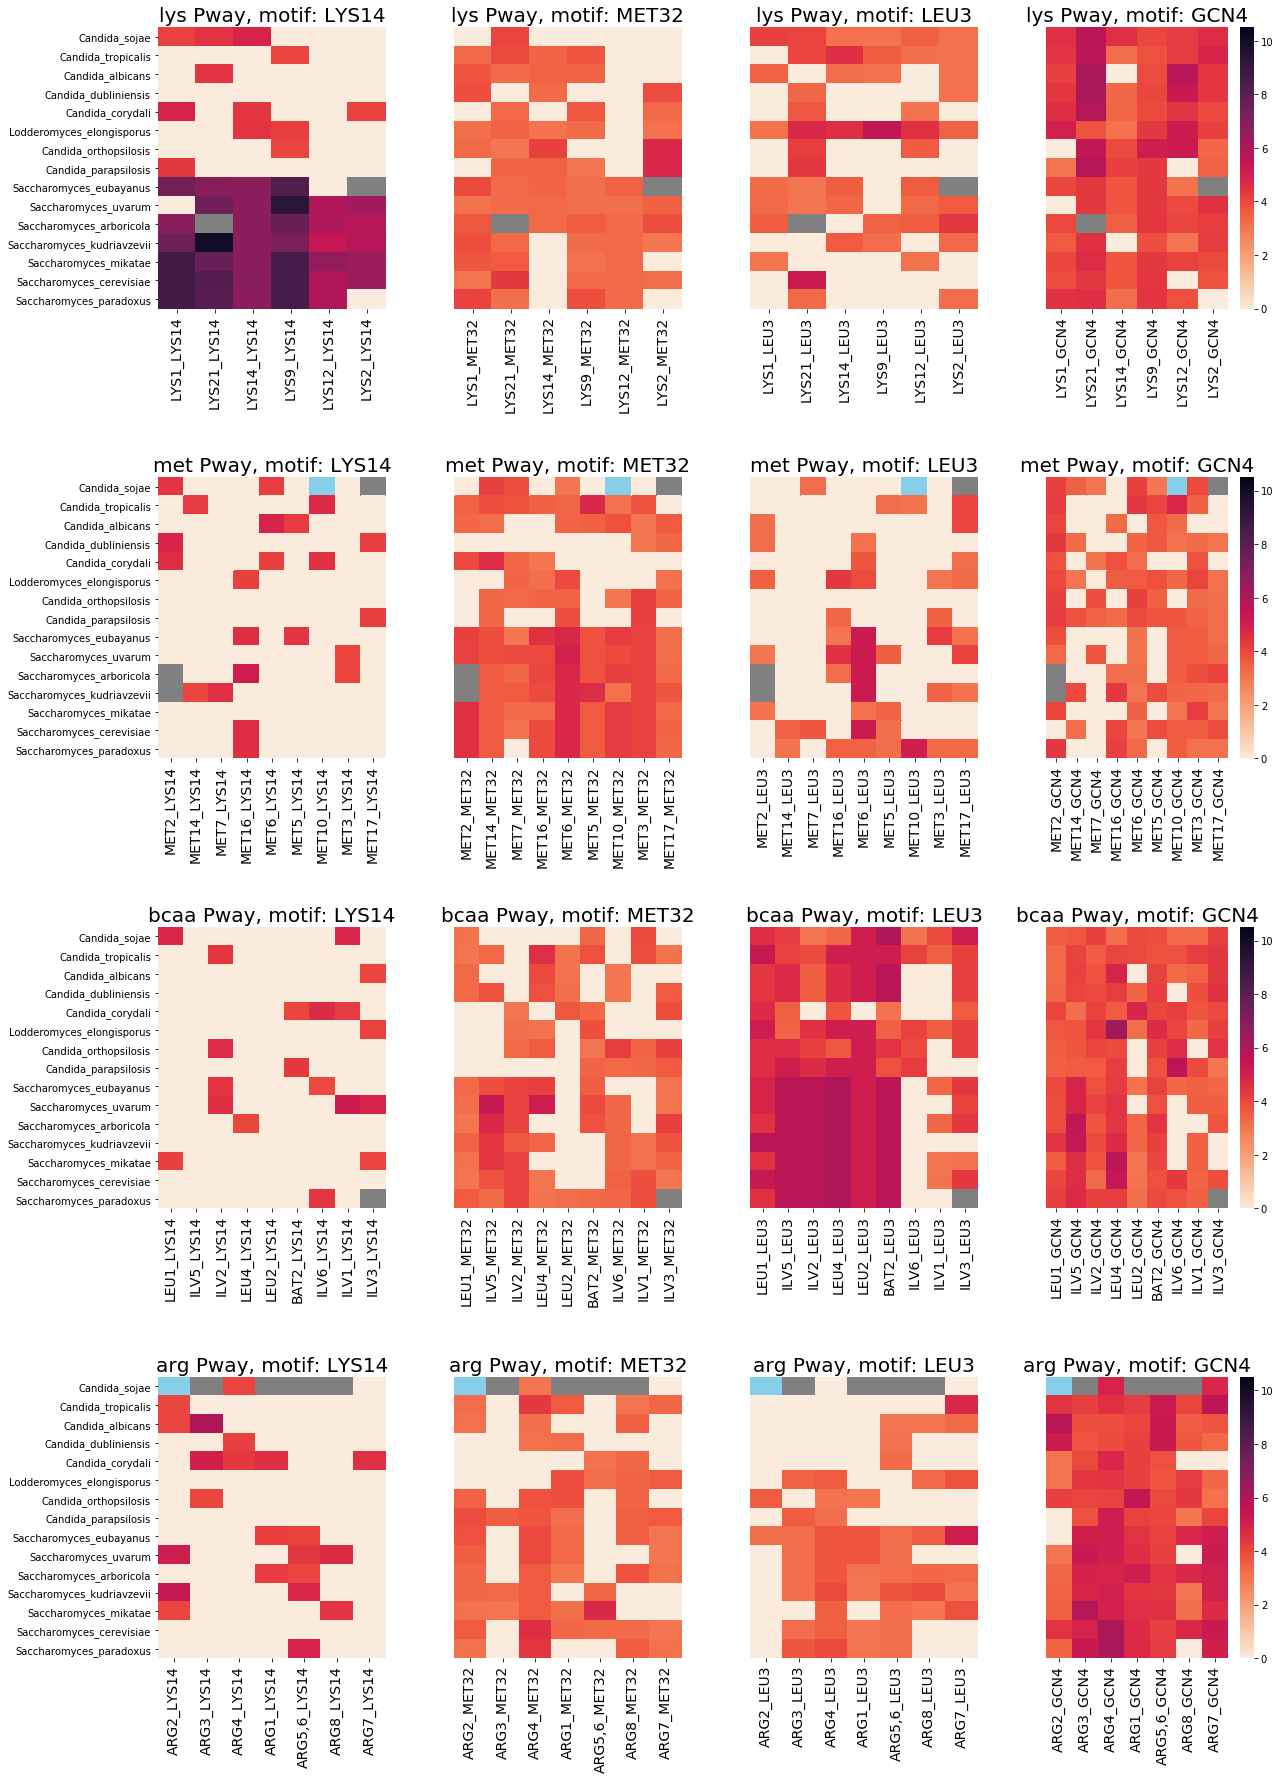

In [44]:
motif_names =  ['LYS14','MET32', 'LEU3','GCN4']  #'ARG81', 

fig, axarr = plt.subplots(4,4, figsize=(20,30))
fig.subplots_adjust(wspace = 0.3, hspace = 0.6)

cmap = sns.cm.rocket_r
cmap.set_under('grey')
cmap.set_over('skyblue')
vmin=0.0
vmax = 10.5


for jj, goi_group_name in enumerate(['lys', 'met', 'bcaa', 'arg']):
    for kk, motif_name in enumerate(motif_names):
        print(goi_group_name)
        print(motif_name)       
        ax = axarr[jj,kk]
        show_cbar=False
        if kk==3:
            show_cbar=True
        
        columns_to_view = [goi_common_name + '_' + motif_name for goi_common_name in goi_groups_reorder[goi_group_name]]
        data_matrix_raw = species_data_matrix.loc[ca_cousins_names + sc_cousins_names,columns_to_view]
        data_matrix_raw.fillna(0, inplace=True)
        data_matrix_raw.replace('NO_ORTH',-1, inplace=True)
        data_matrix = data_matrix_raw.replace('short_promoters',20)
        data_matrix = data_matrix.apply(pd.to_numeric)  #not sure why numbers are suddenly strings
        sns.heatmap(data_matrix, ax=ax, cmap = sns.cm.rocket_r, vmin = vmin, vmax =vmax, cbar=show_cbar)
        ax.set_title(goi_group_name + ' Pway, motif: '+ motif_name, fontdict={'size':20})
        
        #ax.set_xticklabels('')
        ax.set_xticklabels(ax.get_xticklabels(), fontdict = {'size':14}, rotation=90)
        ax.set_ylabel('')
        if kk>0:
            ax.set_yticks([])
fig.savefig(home_dir + os.path.normpath('scratch/20190618_SC_CA_subclades.svg'))       

## GCN4 for all metabolic genes

In [48]:
y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

#not including outgroup species
y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']

# #Select only clades of interest: 
# clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
# #clades_of_interest = {'Saccharomycetaceae'}
# y1000_species_subset = y1000_species[y1000_species['Major clade'].isin(clades_of_interest)]

outgroup = 'Lipomyces starkeyi'
outgroup_orig_genome = y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'].values[0]
#'Yarrowia lipolytica'
# #outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
# y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])


In [49]:

gois = list(aa_met_genes.index)

#Make promoter files for various genes of interest
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]

goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

more than one goi in same orthogroup :OG1030 found_genes: 
['110_4697', '110_4199']
more than one goi in same orthogroup :OG1096 found_genes: 
['110_4987', '110_946']
more than one goi in same orthogroup :OG1115 found_genes: 
['110_827', '110_449']
more than one goi in same orthogroup :OG1210 found_genes: 
['110_1406', '110_425']
more than one goi in same orthogroup :OG1313 found_genes: 
['110_447', '110_3134']
more than one goi in same orthogroup :OG1433 found_genes: 
['110_634', '110_2626']
more than one goi in same orthogroup :OG1516 found_genes: 
['110_695', '110_4813']
more than one goi in same orthogroup :OG1675 found_genes: 
['110_1965', '110_4331']
more than one goi in same orthogroup :OG1892 found_genes: 
['110_217', '110_2273']
more than one goi in same orthogroup :OG2588 found_genes: 
['110_1713', '110_4392']


In [82]:
#Only need to do once
#Extract promoters for all metabolic genes - make sure to load 
#all_pways_combined dictionary first


L_prom = 700

for goi_group_name in ['gly', 'his', 'lys']:
#for goi_group_name, goi_group in all_pways_combined.items(): #['lys', 'met']:
    print(goi_group_name)
    goi_group = all_pways_combined[goi_group_name]
    for goi_common_name in goi_group:
        print(goi_common_name)
        goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
        goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
        og = goi_og_lookup[goi_y1000_id]
        og_genes = og_genes_lookup[og]


        #For a given orthogroup extract promoters
        og_genes_y1000_gene_id = y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_common_name)
        print(goi_common_name + ' promoter extraction complete')
    print(goi_group_name + ' promoter extraction complete')

gly
AGX1
12_428
AGX1 promoter extraction complete
GLY1
promoter region extends past the scaffold, genome_name = yHMPu5000034655_botryozyma_nematodophila_160519 Gene = Seq_753, L_prom = 700
promoter region extends past the scaffold, genome_name = candida_sojae Gene = Seq_1256, L_prom = 700
12_1361
12_2966
promoter region extends past the scaffold, genome_name = yHMPu5000034631_martiniozyma_abiesophila_161215 Gene = Seq_6504, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000034952_citeromyces_siamensis_160519 Gene = Seq_5788, L_prom = 700
GLY1 promoter extraction complete
gly promoter extraction complete
his
HIS1
promoter region extends past the scaffold, genome_name = spathaspora_girioi Gene = Seq_4556, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000034655_botryozyma_nematodophila_160519 Gene = Seq_3105, L_prom = 700
12_3032
promoter region extends past the scaffold, genome_name = lachancea_waltii Gene = Seq_2521, L_prom = 70

promoter region extends past the scaffold, genome_name = yHMPu5000034655_botryozyma_nematodophila_160519 Gene = Seq_12, L_prom = 700
12_765
LYS9 promoter extraction complete
lys promoter extraction complete


In [86]:
#For each goi set, find motifs in each promoter, store data 
#Extract promoters for all gois 

#Key: y1000_id

#fields: species, gene_id, MOTIF_count, MOTIF_loc, MOTIF_score, MOTIF_context

#(thresh, motif_fname, motif_in_file)
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme', 'All'),
                    'LYS14':(1e-4, home_dir + 'github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme', 'All')
                    #'LEU3': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/LEU3_jaspar_MA0324.1.meme','All'), 
                    #'ARG81': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme', 'All'),
                    #'MET32': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/MET32_jaspar_MA0333.1.meme', 'All')
                   }

Lprom_thresh=50

fig2_to_orig = dict(zip(y1000_species_subset['species_names_fig2'], y1000_species_subset['original_genome_id']))
motif_names =  motif_hit_params.keys()

#set up data matrix based on time-calibrated species tree, and take subset of species based on species subset
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)
t.ladderize()

genome_names = []
fig2_names = []
for node in t.iter_leaves():  
    #node.name is species_names_fig2
    #convert to original_genome_id
    genome_name = fig2_to_orig[node.name]
    if genome_name in set(y1000_species_subset['original_genome_id']):
        genome_names.append(genome_name)
        fig2_names.append(node.name)
    
species_data_matrix = pd.DataFrame.from_dict({'original_genome_id':genome_names, 'species_names_fig2': fig2_names})
species_data_matrix.set_index('species_names_fig2', inplace=True)


for goi_group_name, goi_group in all_pways_combined.items():
    print(goi_group_name)
    for goi_common_name in goi_group:
        #goi_common_name = 'LYS4'
        print(goi_common_name)      
        goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
        goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
        og = goi_og_lookup[goi_y1000_id]

        #Convert file name for use with FIMO, also make dictionary to get gene_id and length of promoters
        fname_in = '/home/heineike/genomes/y1000plus/promoter_sets/' + og + '_' + goi_common_name + '.fasta'
        y1000_id_to_gene_id, y1000_id_to_Lprom = y1000plus_tools.convert_promoters_for_fimo(fname_in)

        #Make dataframe to store hits
        goi_hits = pd.DataFrame.from_dict(y1000_id_to_gene_id, orient='index', columns = ['species', 'gene_id'])
        y1000_id_to_Lprom_df = pd.DataFrame.from_dict(y1000_id_to_Lprom, orient='index', columns = ['Lprom'])
        goi_hits = goi_hits.merge(y1000_id_to_Lprom_df, how = 'outer', left_index=True, right_index=True)



        #Run FIMO and load results
        promoters_prefix = og + '_' + goi_common_name
        for motif_name, (thresh, motif_fname, motif_in_file) in motif_hit_params.items(): 
            fimo_hits = y1000plus_tools.promoter_scan_fimo(promoters_prefix, motif_name, motif_fname, thresh)

            goi_hits_motif = {}

            for y1000_id in goi_hits.index: 
                prom_Lprom = y1000_id_to_Lprom[y1000_id]
                prom_hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]
                locs = []
                strands = []
                pvals = []
                seqs = []

                for prom_hit in prom_hits.iterrows():
                    #Just recording location of the start of the motif
                    strand = prom_hit[1]['strand']
                    strands.append(strand)
                    if strand == '-':
                        locs.append(prom_Lprom-prom_hit[1]['stop'])
                    elif strand == '+': 
                        locs.append(prom_Lprom-prom_hit[1]['start'])
                    seqs.append(prom_hit[1]['matched_sequence'])
                    pvals.append(prom_hit[1]['p-value'])

                goi_hits_motif[y1000_id]=(locs, strands, pvals, seqs)

            goi_hits_motif_df = pd.DataFrame.from_dict(goi_hits_motif, orient='index', columns = ['location', 'strand','pval','sequence'])

            goi_hits = goi_hits.merge(goi_hits_motif_df, how='outer', left_index=True, right_index=True)
            goi_hits.rename(columns={col : col + '_' + motif_name for col in ['location', 'strand', 'pval','sequence']}, inplace=True)


        N_orth = []

        min_motif_pval = {motif_name:[] for motif_name in motif_names}

        for genome_name in species_data_matrix['original_genome_id']:   
            spec_proms = goi_hits[goi_hits['species']==genome_name]
            #Could add length filter here

            N_orth_spec = len(spec_proms.index)
            N_orth.append(N_orth_spec)
            if N_orth_spec==0:  
                print('No orthologs for ' + goi_common_name + ', species ' + genome_name)
                for motif_name in motif_names: 
                    min_motif_pval[motif_name].append('NO_ORTH')

            else: 
                #If one or more orthologs, cycles through and keeps min motif_pval.  
                for motif_name in motif_names: 
                    min_motif_pval_spec = np.inf
                    short = True
                    for orth in spec_proms.iterrows():
                        pval_list = orth[1]['pval_' + motif_name]
                        if orth[1]['Lprom']>Lprom_thresh:  #if any of the orthologs have a long enough promoter, the short flag is turned off
                            short = False  
                    
                        if len(pval_list)!=0: 
                            min_motif_pval_spec = min(min_motif_pval_spec, min(pval_list))
                    
                    if short: 
                        print(goi_common_name + ' ' + orth[1]['species'] + ' Lprom too short.')
                        min_motif_pval[motif_name].append('short_promoters')
                    elif min_motif_pval_spec==np.inf: 
                        min_motif_pval[motif_name].append(None)
                    else:
                        min_motif_pval[motif_name].append(-np.log10(min_motif_pval_spec))  #take -log10(pval) in this step

        species_data_matrix[goi_common_name + '_N_orth'] = N_orth
        for motif_name in motif_names:
            species_data_matrix[goi_common_name + '_' + motif_name] = min_motif_pval[motif_name]

species_data_matrix.to_csv(base_dir + os.path.normpath('data/gcn4_liron/20190619_all_pways_gcn4_lys14'))
    

cys_met_thr
MET16
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2871_MET16_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2871_MET16_fimo.fasta
fimo output return code = 0
No orthologs for MET16, species alloascoidea_hylecoeti
No orthologs for MET16, species saccharomycopsis_malanga
No orthologs for MET16, species yHMPu5000034607_saccharomycopsis_capsularis_160519
No orthologs for MET16, species ascoidea_asiatica
No orthologs for MET16, species yHMPu5000035261_candida_ponderosae_160928
No orthologs for MET16, species y

fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1603_THR4_fimo.fasta
fimo output return code = 0
No orthologs for THR4, species yHMPu5000034758_lipomyces_japonicus_160519
THR4 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
THR4 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
THR4 lachancea_waltii Lprom too short.
THR4 lachancea_waltii Lprom too short.
THR4 yHAB164_kazachstania_aerobia_160519 Lprom too short.
THR4 yHAB164_kazachstania_aerobia_160519 Lprom too short.
THR4 yHMPu5000034631_martiniozyma_abiesophila_161215 Lprom too short.
THR4 yHMPu5000034631_martiniozyma_abiesophila_161215 Lprom too short.
MET5
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --th

MET2
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG3006_MET2_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG3006_MET2_fimo.fasta
fimo output return code = 0
MET2 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.
MET2 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.
No orthologs for MET2, species lachancea_quebecensis
No orthologs for MET2, species zygosaccharomyces_bailii
No orthologs for MET2, species yHMPu5000035652_torulaspora_maleeae_160613
No orthologs for MET2, species yHMPu5000026152_torulaspo

MET3
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2365_MET3_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2365_MET3_fimo.fasta
fimo output return code = 0
MET3 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.
MET3 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.
No orthologs for MET3, species saccharomycopsis_malanga
No orthologs for MET3, species yHMPu5000034607_saccharomycopsis_capsularis_160519
No orthologs for MET3, species ascoidea_asiatica
MET3 yHMPu5000035261_candida_ponderosae_160928 Lprom

No orthologs for HIS1, species ogataea_polymorpha
No orthologs for HIS1, species yHMPu5000035040_ambrosiozyma_maleeae_160519
No orthologs for HIS1, species ambrosiozyma_kashinagacola
No orthologs for HIS1, species yHMPu5000026145_ambrosiozyma_vanderkliftii_160519
No orthologs for HIS1, species yHMPu5000035041_ambrosiozyma_pseudovanderkliftii_160519
No orthologs for HIS1, species ambrosiozyma_monospora
No orthologs for HIS1, species yHMPu5000034946_ambrosiozyma_oregonensis_160519
No orthologs for HIS1, species yHMPu5000026137_ambrosiozyma_ambrosiae_160519
No orthologs for HIS1, species dekkera_bruxellensis
No orthologs for HIS1, species brettanomyces_anomalus
No orthologs for HIS1, species yHMPu5000035674_kregervanrija_delftensis_160613
No orthologs for HIS1, species yHMPu5000035675_kregervanrija_fluxuum_160613
No orthologs for HIS1, species yHMPu5000034631_martiniozyma_abiesophila_161215
No orthologs for HIS1, species yHMPu5000034614_saturnispora_silvae_160519
No orthologs for HIS1, sp

HIS6 yHMPu5000034631_martiniozyma_abiesophila_161215 Lprom too short.
HIS6 yHMPu5000034631_martiniozyma_abiesophila_161215 Lprom too short.
No orthologs for HIS6, species yHMPu5000034611_saturnispora_mendoncae_160519
HIS7
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2357_HIS7_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2357_HIS7_fimo.fasta
fimo output return code = 0
No orthologs for HIS7, species yHMPu5000035629_yueomyces_sinensis_160519
No orthologs for HIS7, species tetrapisispora_blattae
HIS7 yHMPu5000034631_ma

fimo output return code = 0
No orthologs for ARG1, species yarrowia_lipolytica
No orthologs for ARG1, species candida_sojae
ARG2
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2173_ARG2_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2173_ARG2_fimo.fasta
fimo output return code = 0
ARG2 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
ARG2 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
No orthologs for ARG2, species hanseniaspora_uvarum
No orthologs for ARG2, species yHMPu5000034625_pich

No orthologs for AAT1, species yHMPu5000034611_saturnispora_mendoncae_160519
No orthologs for AAT1, species yHMPu5000034613_saturnispora_serradocipensis_160519
No orthologs for AAT1, species yHMPu5000035301_pichia_terricola_160928
No orthologs for AAT1, species candida_sorboxylosa
No orthologs for AAT1, species yHMPu5000034624_pichia_nakasei_160519
No orthologs for AAT1, species yHMPu5000034627_pichia_heedii_160519
No orthologs for AAT1, species yHMPu5000034629_pichia_exigua_160519
No orthologs for AAT1, species yHMPu5000034623_pichia_norvegensis_160519
No orthologs for AAT1, species meyerozyma_guilliermondii
No orthologs for AAT1, species yHMPu5000035662_meyerozyma_caribbica_160613
No orthologs for AAT1, species candida_carpophila
No orthologs for AAT1, species yHMPu5000034606_priceomyces_medius_160519
No orthologs for AAT1, species yHMPu5000035297_priceomyces_castillae_160928
No orthologs for AAT1, species priceomyces_haplophilus
AAT1 spathaspora_gorwiae Lprom too short.
AAT1 spathas

No orthologs for ARO4, species yHMPu5000034631_martiniozyma_abiesophila_161215
No orthologs for ARO4, species yHMPu5000034614_saturnispora_silvae_160519
No orthologs for ARO4, species yHMPu5000034611_saturnispora_mendoncae_160519
No orthologs for ARO4, species yHMPu5000034612_saturnispora_saitoi_160519
No orthologs for ARO4, species yHMPu5000034615_saturnispora_zaruensis_160519
No orthologs for ARO4, species yHMPu5000035659_saturnispora_dispora_160519
No orthologs for ARO4, species yHMPu5000034610_saturnispora_hagleri_160519
No orthologs for ARO4, species yHMPu5000034613_saturnispora_serradocipensis_160519
No orthologs for ARO4, species yHMPu5000035301_pichia_terricola_160928
No orthologs for ARO4, species yHMPu5000034624_pichia_nakasei_160519
No orthologs for ARO4, species yHMPu5000034627_pichia_heedii_160519
No orthologs for ARO4, species yHMPu5000034623_pichia_norvegensis_160519
No orthologs for ARO4, species yHMPu5000034999_cephaloascus_fragrans_160519
No orthologs for ARO4, specie

No orthologs for PHA2, species yHMPu5000034901_ogataea_methylivora_160519
No orthologs for PHA2, species yHMPu5000034636_ogataea_nitratoaversa_160519
No orthologs for PHA2, species yHMPu5000034902_ogataea_minuta_160519
No orthologs for PHA2, species yHMPu5000034899_ogataea_kodamae_160519
No orthologs for PHA2, species yHMPu5000034893_ogataea_philodendra_160519
No orthologs for PHA2, species yHMPu5000034631_martiniozyma_abiesophila_161215
No orthologs for PHA2, species yHMPu5000035301_pichia_terricola_160928
No orthologs for PHA2, species pichia_membranifaciens
No orthologs for PHA2, species yHMPu5000034624_pichia_nakasei_160519
No orthologs for PHA2, species yHMPu5000034629_pichia_exigua_160519
No orthologs for PHA2, species yHMPu5000034623_pichia_norvegensis_160519
No orthologs for PHA2, species candida_sojae
ARO7
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expr

No orthologs for ARO1, species yHMPu5000034918_nakazawaea_holstii_160519
No orthologs for ARO1, species candida_succiphila
ARO1 spathaspora_hagerdaliae Lprom too short.
ARO1 spathaspora_hagerdaliae Lprom too short.
No orthologs for ARO1, species candida_sojae
TRP5
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1724_TRP5_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1724_TRP5_fimo.fasta
fimo output return code = 0
TRP5 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.
TRP5 yHMPu5000034673_blastobotrys_nivea_160

SER1 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
SER1 yHMPu5000034655_botryozyma_nematodophila_160519 Lprom too short.
No orthologs for SER1, species yHMPu5000035658_starmera_amethionina_160613
No orthologs for SER1, species wickerhamomyces_anomalus
No orthologs for SER1, species yHMPu5000035271_wickerhamomyces_bovis_160928
No orthologs for SER1, species yHMPu5000035044_barnettozyma_californica_160519
No orthologs for SER1, species yHMPu5000035687_cyberlindnera_suaveolens_160613
No orthologs for SER1, species yHMPu5000035686_cyberlindnera_saturnus_160519
No orthologs for SER1, species yHMPu5000034979_cyberlindnera_misumaiensis_160519
No orthologs for SER1, species cyberlindnera_jadinii
No orthologs for SER1, species yHMPu5000034957_hanseniaspora_osmophila_160519
No orthologs for SER1, species yHMPu5000034862_zygotorulaspora_florentina_160519
No orthologs for SER1, species nakaseomyces_bacillisporus
No orthologs for SER1, species yHAB164_kazachstania_aerobia_160519


fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1433_SER3_fimo.fasta
fimo output return code = 0
SER3 yHMPu5000035654_tortispora_ganteri_160519 Lprom too short.
SER3 yHMPu5000035654_tortispora_ganteri_160519 Lprom too short.
No orthologs for SER3, species candida_sojae
SHM1
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1030_SHM1_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_dat

LYS12
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2746_LYS12_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2746_LYS12_fimo.fasta
fimo output return code = 0
LYS12 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.
LYS12 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.
No orthologs for LYS12, species yHMPu5000035037_candida_montana_160519
No orthologs for LYS12, species yHMPu5000035670_phaffomyces_opuntiae_160613
No orthologs for LYS12, species yHMPu5000035673_candida_orba_160613
No orthologs for LY

No orthologs for LYS5, species candida_succiphila
No orthologs for LYS5, species yHMPu5000034904_ogataea_nonfermentans_160519
No orthologs for LYS5, species yHMPu5000034899_ogataea_kodamae_160519
No orthologs for LYS5, species yHMPu5000034893_ogataea_philodendra_160519
No orthologs for LYS5, species ogataea_parapolymorpha
No orthologs for LYS5, species ogataea_polymorpha
No orthologs for LYS5, species ambrosiozyma_kashinagacola
No orthologs for LYS5, species yHMPu5000034946_ambrosiozyma_oregonensis_160519
No orthologs for LYS5, species yHMPu5000035667_kurtzmaniella_cleridarum_160928
No orthologs for LYS5, species yHMPu5000034632_candida_athensensis_160519
No orthologs for LYS5, species yHMPu5000041863_candida_gorgasii_160928
No orthologs for LYS5, species millerozyma_acaciae
No orthologs for LYS5, species yHMPu5000041713_debaryomyces_maramus_160928
No orthologs for LYS5, species yHMPu5000041693_debaryomyces_nepalensis_160928
No orthologs for LYS5, species debaryomyces_hansenii
No ortho

LEU4
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1115_LEU4_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1115_LEU4_fimo.fasta
fimo output return code = 0
BAT2
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1210_BAT2_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fi

ILV5 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.
ILV5 yHMPu5000034673_blastobotrys_nivea_160519 Lprom too short.


In [ ]:
#Why so many NANs on Leu1 GCN4

In [87]:
species_data_matrix

original_genome_id  \
species_names_fig2                                                                             
Lipomyces_oligophaga                             yHMPu5000034748_lipomyces_oligophaga_160519   
Lipomyces_suomiensis                             yHMPu5000034742_lipomyces_suomiensis_160519   
Lipomyces_lipofer                                   yHMPu5000034761_lipomyces_lipofer_160519   
Lipomyces_japonicus                               yHMPu5000034758_lipomyces_japonicus_160519   
Lipomyces_doorenjongii                         yHMPu5000034757_lipomyces_doorenjongii_160519   
Lipomyces_kononenkoae                           yHMPu5000034760_lipomyces_kononenkoae_160519   
Lipomyces_starkeyi                                                        lipomyces_starkeyi   
Lipomyces_arxii                                       yHMPu5000034754_lipomyces_arxii_160519   
Lipomyces_mesembrius                             yHMPu5000034749_lipomyces_mesembrius_160519   
Trigonopsis_variabilis                         yHMPu5000035650_trigonopsis_variabilis_160613   
Trigonopsis_vinaria                               yHMPu5000035282_trigonopsis_vinaria_160928   
Botryozyma_nematodophila                     yHMPu5000034655_botryozyma_nematodophila_160519   
Tortispora_starmeri                               yHMPu5000035279_tortispora_starmeri_160928   
Tortispora_ganteri                                 yHMPu5000035654_tortispora_ganteri_160519   
Tortispora_caseinolytica                                            tortispora_caseinolytica   
Nadsonia_fulvescens_var._fulvescens               yHMPu5000034635_nadsonia_fulvescens_160519   
Nadsonia_fulvescens_var._elongata                           nadsonia_fulvescens_var_elongata   
Candida_hispaniensis                             yHMPu5000035633_candida_hispaniensis_160519   
Yarrowia_bubula                                       yHMPu5000035643_yarrowia_bubula_160519   
Yarrowia_keelungensis                                                  yarrowia_keelungensis   
Yarrowia_lipolytica                                                      yarrowia_lipolytica   
Yarrowia_deformans                                                        yarrowia_deformans   
Yarrowia_divulgata                                 yHMPu5000035645_yarrowia_divulgata_160519   
Middelhovenomyces_tepae                       yHMPu5000035665_middelhovenomyces_tepae_160613   
Magnusiomyces_tetraspermus                  yHMPu5000041818_magnusiomyces_tetrasperma_160928   
Saprochaete_clavata                                                      saprochaete_clavata   
Geotrichum_candidum                                                      geotrichum_candidum   
Dipodascus_albidus                                 yHMPu5000034661_dipodascus_albidus_160519   
Dipodascus_geniculatus                         yHMPu5000041822_dipodascus_geniculatus_160928   
Candida_incommunis                                 yHMPu5000035244_candida_incommunis_160928   
...                                                                                      ...   
Candida_fructus                                       yHMPu5000034988_candida_fructus_160519   
Clavispora_lusitaniae                                                  clavispora_lusitaniae   
Candida_blattae                                       yHMPu5000035335_candida_blattae_160928   
Candida_intermedia                                                        candida_intermedia   
Candida_wancherniae                               yHMPu5000041840_candida_wancherniae_160928   
Candida_golubevii                                   yHMPu5000041862_candida_golubevii_160928   
Metschnikowia_bicuspidata_var._bicuspidata                         metschnikowia_bicuspidata   
Candida_hawaiiana                                   yHMPu5000041743_candida_hawaiiana_160928   
Metschnikowia_kipukae                                                  metschnikowia_kipukae   
Metschnikowia_hibisci                     

cys_met_thr
LYS14
cys_met_thr
GCN4
glu
LYS14
glu
GCN4
his
LYS14
his
GCN4
gln
LYS14
gln
GCN4
arg
LYS14
arg
GCN4
asp
LYS14
asp
GCN4
aromatic
LYS14
aromatic
GCN4
ser
LYS14
ser
GCN4
asn
LYS14
asn
GCN4
pro
LYS14
pro
GCN4
lys
LYS14
lys
GCN4
gly
LYS14
gly
GCN4
bcaa
LYS14
bcaa
GCN4


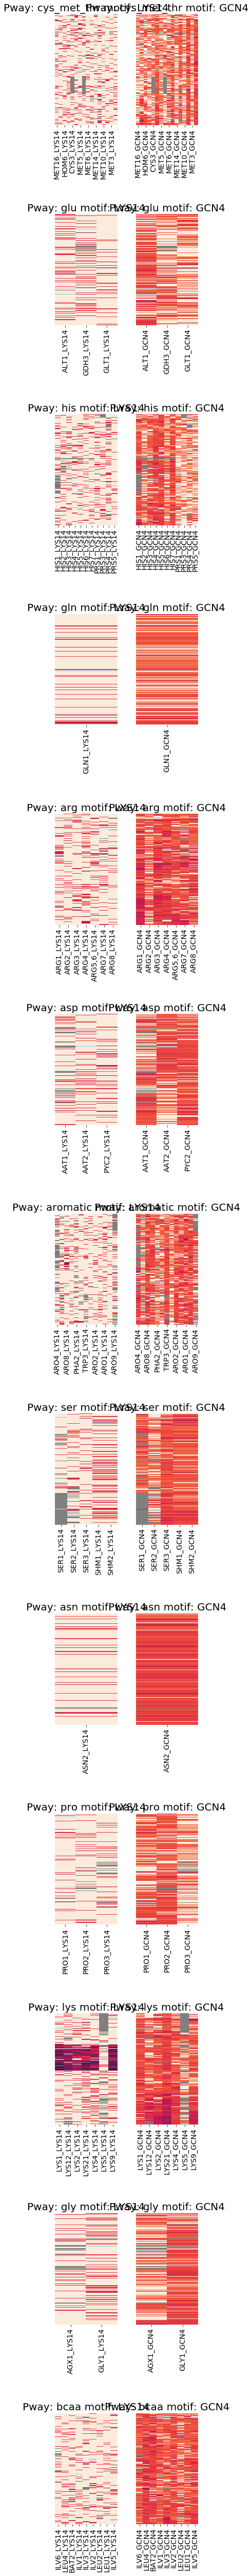

In [95]:

fig, axarr = plt.subplots(len(all_pways_combined.keys()),2, figsize=(5,90))
fig.subplots_adjust(wspace = 0.3, hspace = 0.8)

cmap = sns.cm.rocket_r
cmap.set_under('grey')
cmap.set_over('skyblue')
vmin=0.0
vmax = 10.5

motif_names = ['LYS14', 'GCN4']


for jj, (goi_group_name, goi_group) in enumerate(all_pways_combined.items()):
    for kk, motif_name in enumerate(motif_names):
        print(goi_group_name)
        print(motif_name)       
        ax = axarr[jj,kk]
        show_cbar=False
        if kk==3:
            show_cbar=True
        
        columns_to_view = [goi_common_name + '_' + motif_name for goi_common_name in goi_group]
        data_matrix_raw = species_data_matrix.loc[:,columns_to_view]
        data_matrix_raw.fillna(0, inplace=True)
        data_matrix_raw.replace('NO_ORTH',-1, inplace=True)
        data_matrix = data_matrix_raw.replace('short_promoters',20)
        data_matrix = data_matrix.apply(pd.to_numeric)  #not sure why numbers are suddenly strings
        sns.heatmap(data_matrix, ax=ax, cmap = sns.cm.rocket_r, vmin = vmin, vmax =vmax, cbar=show_cbar)
        ax.set_title('Pway: ' + goi_group_name + ' motif: '+ motif_name, fontdict={'size':20})
        ax.set_yticks([])
        #ax.set_xticklabels('')
        ax.set_xticklabels(ax.get_xticklabels(), fontdict = {'size':14}, rotation=90)
        ax.set_ylabel('')
fig.savefig(home_dir + os.path.normpath('scratch/20190619_all_met_genes_GCN4_LYS14.svg'))

In [92]:
plt.subplots_adjust?